# About Data set

The Air Quality Data in India (2015-2020) dataset available on Kaggle contains air quality data collected across various monitoring stations in India from 2015 to 2020. The data was collected by the Central Pollution Control Board of India and includes measurements for several pollutants such as PM2.5, PM10, nitrogen dioxide, sulphur dioxide, ozone, carbon monoxide, benzene, toluene, and xylene.

+ Station ID (station_id): ID number of the monitoring station where the data was collected.
+ Date and time (Datetime): Date and time of the measurement in yyyy-mm-dd hh:mm:ss format.
+ PM2.5 Particulate Matter (PM2.5): Concentration of particulate matter with a diameter of 2.5 micrometers or less, in micrograms per cubic meter (µg/m3).
+ PM10 Particulate Matter (PM10): Concentration of particulate matter with a diameter of 10 micrometers or less, in micrograms per cubic meter (µg/m3).
+ Nitrogen Dioxide (NO2): Concentration of nitrogen dioxide, in parts per billion (ppb).
+ Sulphur Dioxide (SO2): Concentration of sulphur dioxide, in parts per billion (ppb).
+ Ozone (O3): Concentration of ozone, in parts per billion (ppb).
+ Carbon Monoxide (CO): Concentration of carbon monoxide, in parts per million (ppm).
+ Benzene (C6H6): Concentration of benzene, in micrograms per cubic meter (µg/m3).
+ Toluene (C7H8): Concentration of toluene, in micrograms per cubic meter (µg/m3).
+ Xylene (C8H10): Concentration of xylene, in micrograms per cubic meter (µg/m3).
+ AQI (AQI): Air Quality Index value calculated based on the concentrations of various pollutants in the air. The higher the AQI value, the greater the level of air pollution and associated health risks.

![alt text](image.jpg)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv('station_day.csv')

In [3]:
df.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


In [4]:
df.shape

(108035, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108035 entries, 0 to 108034
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   StationId   108035 non-null  object 
 1   Date        108035 non-null  object 
 2   PM2.5       86410 non-null   float64
 3   PM10        65329 non-null   float64
 4   NO          90929 non-null   float64
 5   NO2         91488 non-null   float64
 6   NOx         92535 non-null   float64
 7   NH3         59930 non-null   float64
 8   CO          95037 non-null   float64
 9   SO2         82831 non-null   float64
 10  O3          82467 non-null   float64
 11  Benzene     76580 non-null   float64
 12  Toluene     69333 non-null   float64
 13  Xylene      22898 non-null   float64
 14  AQI         87025 non-null   float64
 15  AQI_Bucket  87025 non-null   object 
dtypes: float64(13), object(3)
memory usage: 13.2+ MB


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,86410.0,80.272571,76.526403,0.02,31.880,55.95,99.9200,1000.00
PM10,65329.0,157.968427,123.418672,0.01,70.150,122.09,208.6700,1000.00
NO,90929.0,23.123424,34.491019,0.01,4.840,10.29,24.9800,470.00
NO2,91488.0,35.240760,29.510827,0.01,15.090,27.21,46.9300,448.05
NOx,92535.0,41.195055,45.145976,0.00,13.970,26.66,50.5000,467.63
NH3,59930.0,28.732875,24.897797,0.01,11.900,23.59,38.1375,418.90
CO,95037.0,1.605749,4.369578,0.00,0.530,0.91,1.4500,175.81
SO2,82831.0,12.257634,12.984723,0.01,5.040,8.95,14.9200,195.65
O3,82467.0,38.134836,39.128004,0.01,18.895,30.84,47.1400,963.00
Benzene,76580.0,3.358029,11.156234,0.00,0.160,1.21,3.6100,455.03


In [4]:
df.isnull().sum()

StationId         0
Date              0
PM2.5         21625
PM10          42706
NO            17106
NO2           16547
NOx           15500
NH3           48105
CO            12998
SO2           25204
O3            25568
Benzene       31455
Toluene       38702
Xylene        85137
AQI           21010
AQI_Bucket    21010
dtype: int64

In [13]:
df.dropna(subset=['AQI'],inplace=True)

In [6]:
df.isnull().sum()

StationId         0
Date              0
PM2.5          3488
PM10          23961
NO             2229
NO2            1566
NOx            4555
NH3           29832
CO             2896
SO2            9533
O3             9598
Benzene       19787
Toluene       26324
Xylene        67584
AQI               0
AQI_Bucket        0
dtype: int64

In [9]:
df.isnull().sum()/sum(df.isnull().sum())*100

StationId      0.000000
Date           0.000000
PM2.5          1.732281
PM10          11.899997
NO             1.107011
NO2            0.777739
NOx            2.262196
NH3           14.815771
CO             1.438270
SO2            4.734471
O3             4.766753
Benzene        9.827020
Toluene       13.073557
Xylene        33.564933
AQI            0.000000
AQI_Bucket     0.000000
dtype: float64

In [14]:
# Create a list of all columns except AQI, AQI_Bucket, station_Id, and date
cols = [col for col in df.columns if col not in ['AQI', 'AQI_Bucket', 'StationId', 'Date']]

# Filter the dataset to keep only the records where all the columns except AQI, AQI_Bucket, station_Id, and date are null
null_records = df[df[cols].isnull().all(axis=1)]

# Get the number of such records
num_null_records = null_records.shape[0]
print(num_null_records)

271


In [15]:
a=null_records.index

In [16]:
df = df.drop(a)

In [17]:
df.isnull().sum()

StationId         0
Date              0
PM2.5          3217
PM10          23690
NO             1958
NO2            1295
NOx            4284
NH3           29561
CO             2625
SO2            9262
O3             9327
Benzene       19516
Toluene       26053
Xylene        67313
AQI               0
AQI_Bucket        0
dtype: int64

In [18]:
df['PM2.5']=df['PM2.5'].fillna((df['PM2.5'].median()))
df['PM10']=df['PM10'].fillna((df['PM10'].median()))
df['NO']=df['NO'].fillna((df['NO'].median()))
df['NO2']=df['NO2'].fillna((df['NO2'].median()))
df['NOx']=df['NOx'].fillna((df['NOx'].median()))
df['NH3']=df['NH3'].fillna((df['NH3'].median()))
df['CO']=df['CO'].fillna((df['CO'].median()))
df['SO2']=df['SO2'].fillna((df['SO2'].median()))
df['O3']=df['O3'].fillna((df['O3'].median()))
df['Benzene']=df['Benzene'].fillna((df['Benzene'].median()))
df['Toluene']=df['Toluene'].fillna((df['Toluene'].median()))
df['Xylene']=df['Xylene'].fillna((df['Xylene'].median()))

df1 = df
df.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate
5,AP001,2017-11-29,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0,Moderate


In [19]:
df.isnull().sum()

StationId     0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [20]:
df['Date'] = pd.to_datetime(df['Date'])

In [21]:
# Sort DataFrame by date column
df.sort_values(by='Date', inplace = True)

In [22]:
# Resetting the index
df = df.reset_index()
df.pop("index")


0         20277
1         11906
2         11907
3         20278
4         20279
          ...  
86749      3040
86750     34381
86751     33499
86752      2914
86753    108034
Name: index, Length: 86754, dtype: int64

In [34]:
df.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,DL013,2015-01-01,200.96,122.43,17.06,12.39,24.73,42.98,21.82,8.91,30.89,1.38,5.31,0.60,364.0,Very Poor
1,DL007,2015-01-01,425.49,607.98,49.37,40.91,90.29,23.76,0.69,9.06,143.84,9.19,14.16,9.84,579.0,Severe
2,DL007,2015-01-02,172.13,269.55,22.97,40.98,63.94,23.76,1.35,9.06,77.99,4.01,6.19,4.29,497.0,Severe
3,DL013,2015-01-02,251.12,122.43,26.02,17.12,31.50,46.70,13.29,6.79,30.89,1.38,5.31,0.60,410.0,Severe
4,DL013,2015-01-03,95.98,122.43,12.21,16.90,20.16,40.23,9.44,5.30,30.89,1.38,5.31,0.60,404.0,Severe


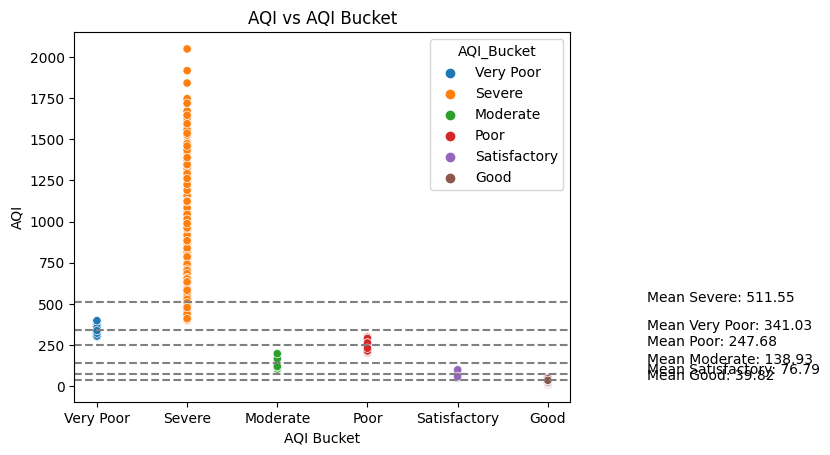

In [36]:
# Get the unique values of AQI_Bucket
aqi_buckets = df["AQI_Bucket"].unique()

# Create a scatter plot with hue = AQI_Bucket
sns.scatterplot(data=df, x="AQI_Bucket", y="AQI", hue="AQI_Bucket")

# Add horizontal lines for each unique AQI_Bucket value
for bucket in aqi_buckets:
    bucket_mean = df[df["AQI_Bucket"] == bucket]["AQI"].mean()
    plt.axhline(y=bucket_mean, xmin=0, xmax=1, color="gray", linestyle="--")
    plt.text(len(aqi_buckets) + 0.1, bucket_mean, f"Mean {bucket}: {bucket_mean:.2f}")

# Set the plot title and axes labels
plt.title("AQI vs AQI Bucket")
plt.xlabel("AQI Bucket")
plt.ylabel("AQI")

# Show the plot
plt.show()


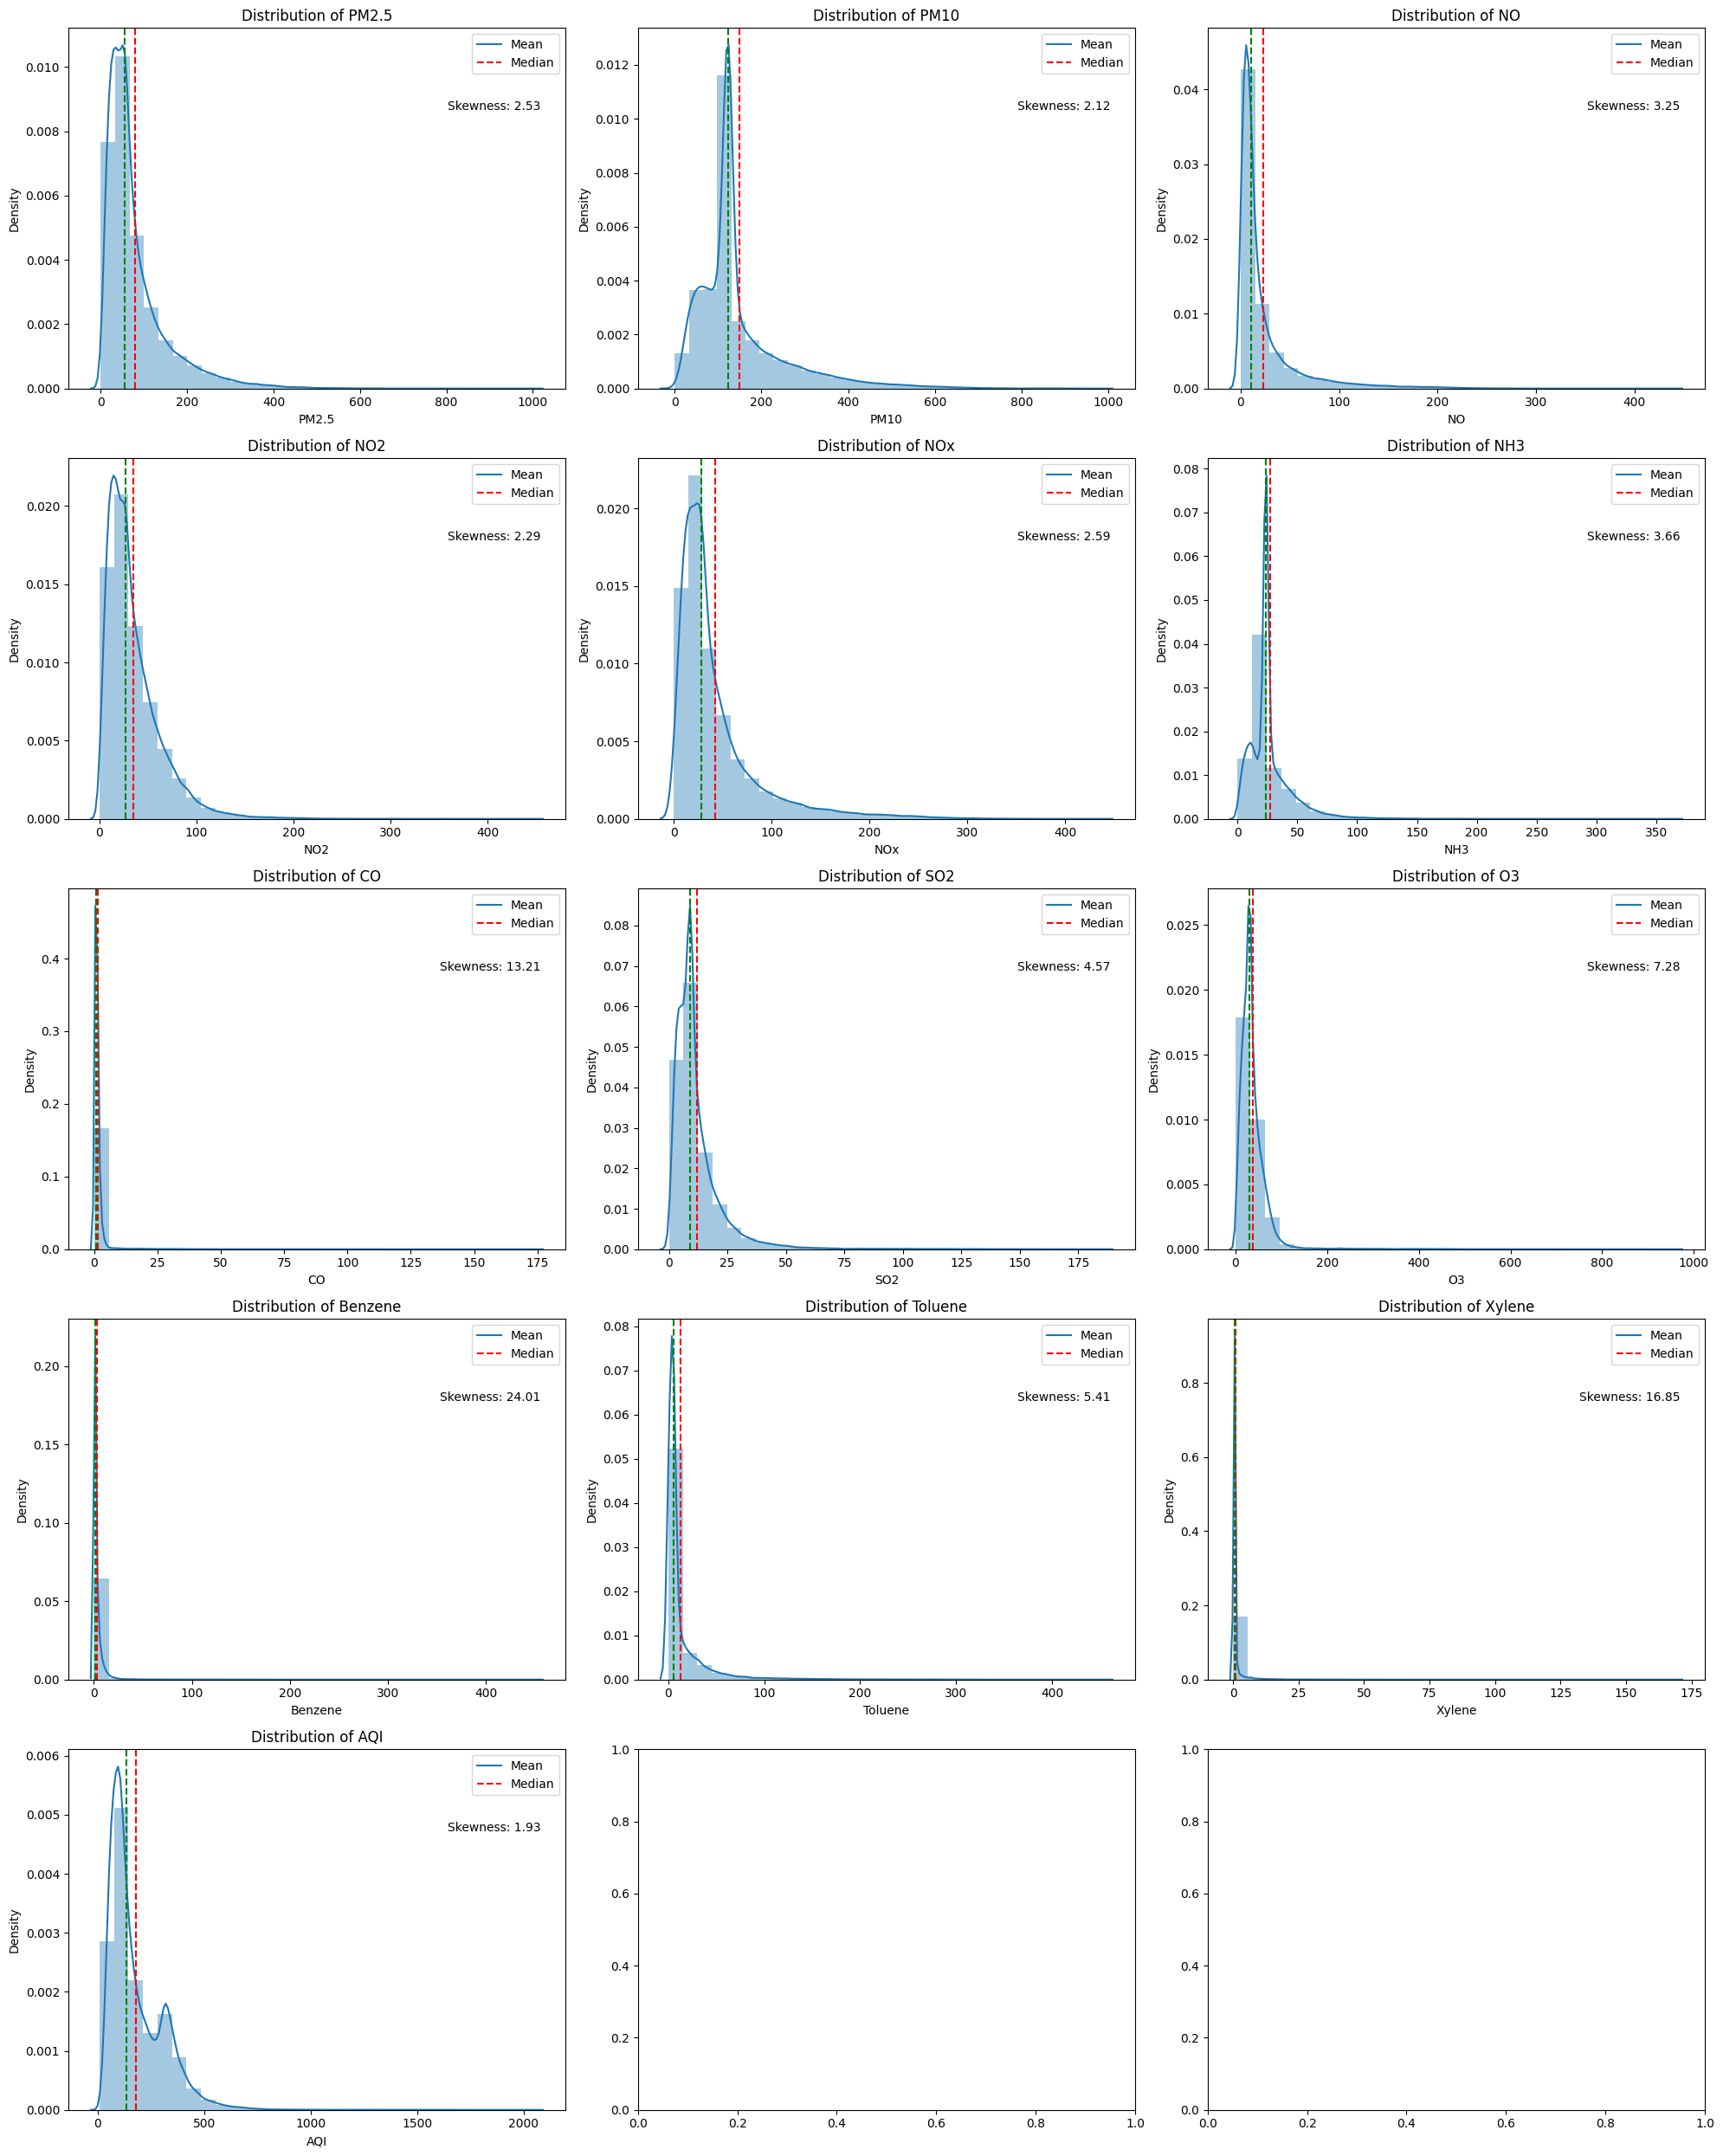

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(20, 25))

for ax, col in zip(axs.flatten(), [i for i in df.columns if i not in ['StationId', 'Date', 'AQI_Bucket']]):
    sns.distplot(df[col], ax=ax, bins=30)
    ax.set_title(f'Distribution of {col}')
    ax.axvline(df[col].mean(), color='red', linestyle='dashed', linewidth=1.5)
    ax.axvline(df[col].median(), color='green', linestyle='dashed', linewidth=1.5)
    
    ax.legend({'Mean': df[col].mean(), 'Median': df[col].median()})
    ax.text(0.95, 0.8, f"Skewness: {df[col].skew():.2f}", transform=ax.transAxes, ha='right', va='top')
    
fig.tight_layout()
plt.show()


In [23]:
# Extract the datetime attributes
df['Year'] = df['Date'].dt.year

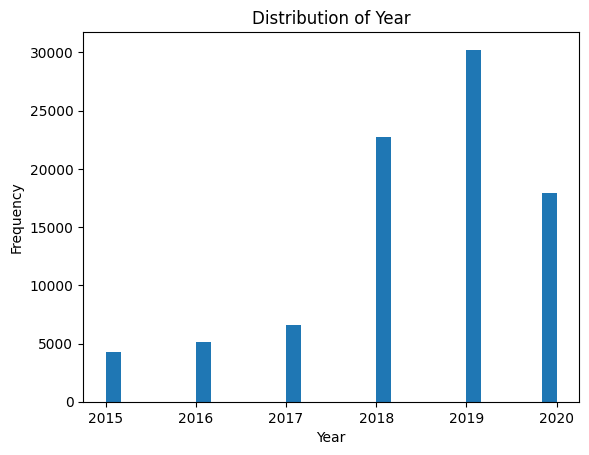

In [17]:
plt.hist(df['Year'], bins=30)
plt.title('Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

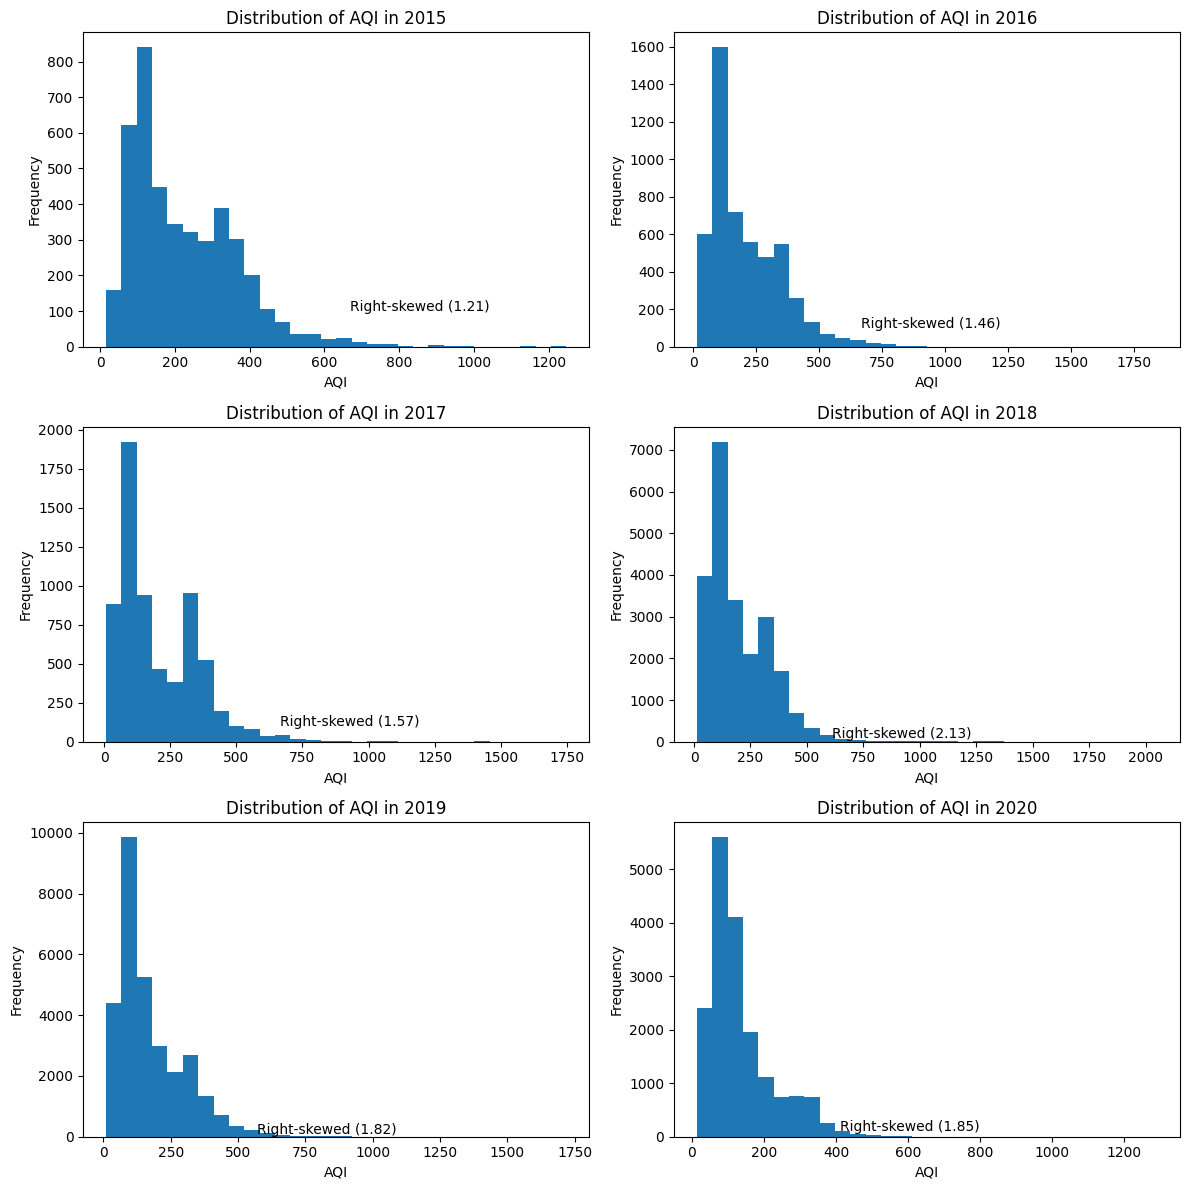

In [42]:
import numpy as np

# Get unique years
years = df['Year'].unique()

# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# Loop through years and plot on subplots
for i, year in enumerate(years):
    # Get data for current year
    year_data = df.loc[df['Year'] == year]
    
    # Calculate skewness of the distribution
    skewness = round(year_data['AQI'].skew(), 2)
    
    # Plot histogram
    row, col = divmod(i, 2)
    axs[row, col].hist(year_data['AQI'], bins=30)
    axs[row, col].set_title(f'Distribution of AQI in {year}')
    axs[row, col].set_xlabel('AQI')
    axs[row, col].set_ylabel('Frequency')
    
    # Add text to show skewness
    if skewness > 0:
        axs[row, col].text(np.percentile(year_data['AQI'], 99), 100, f'Right-skewed ({skewness})')
    elif skewness < 0:
        axs[row, col].text(np.percentile(year_data['AQI'], 5), 20, f'Left-skewed ({skewness})')
    else:
        axs[row, col].text(np.percentile(year_data['AQI'], 5), 20, f'Symmetric ({skewness})')
    
plt.tight_layout()
plt.show()



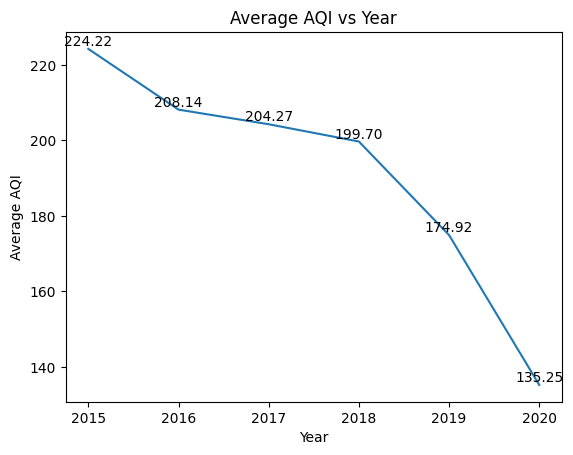

In [18]:
# Calculate the average AQI for each year
avg_aqi = df.groupby('Year')['AQI'].mean().reset_index()

# Plot the average AQI vs year
plt.plot(avg_aqi['Year'], avg_aqi['AQI'])
plt.title('Average AQI vs Year')
plt.xlabel('Year')
plt.ylabel('Average AQI')

# Add text labels for average AQI values
for i, row in avg_aqi.iterrows():
    plt.text(row['Year'], row['AQI'], f"{row['AQI']:.2f}", ha='center', va='bottom')

plt.show()


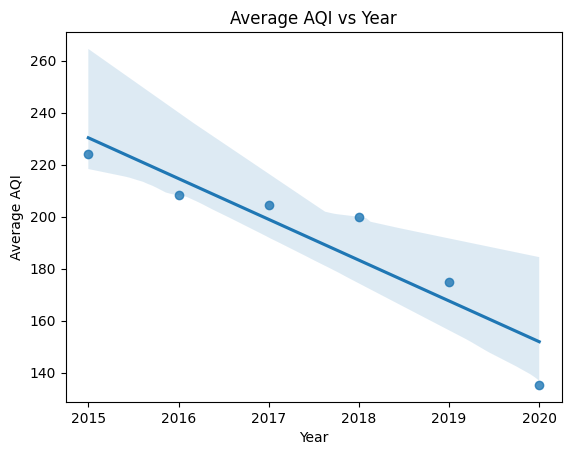

In [44]:
import seaborn as sns

# Calculate the average AQI for each year
avg_aqi = df.groupby('Year')['AQI'].mean().reset_index()

# Plot the average AQI vs year
sns.regplot(data=avg_aqi, x='Year', y='AQI')
plt.title('Average AQI vs Year')
plt.xlabel('Year')
plt.ylabel('Average AQI')
plt.show()

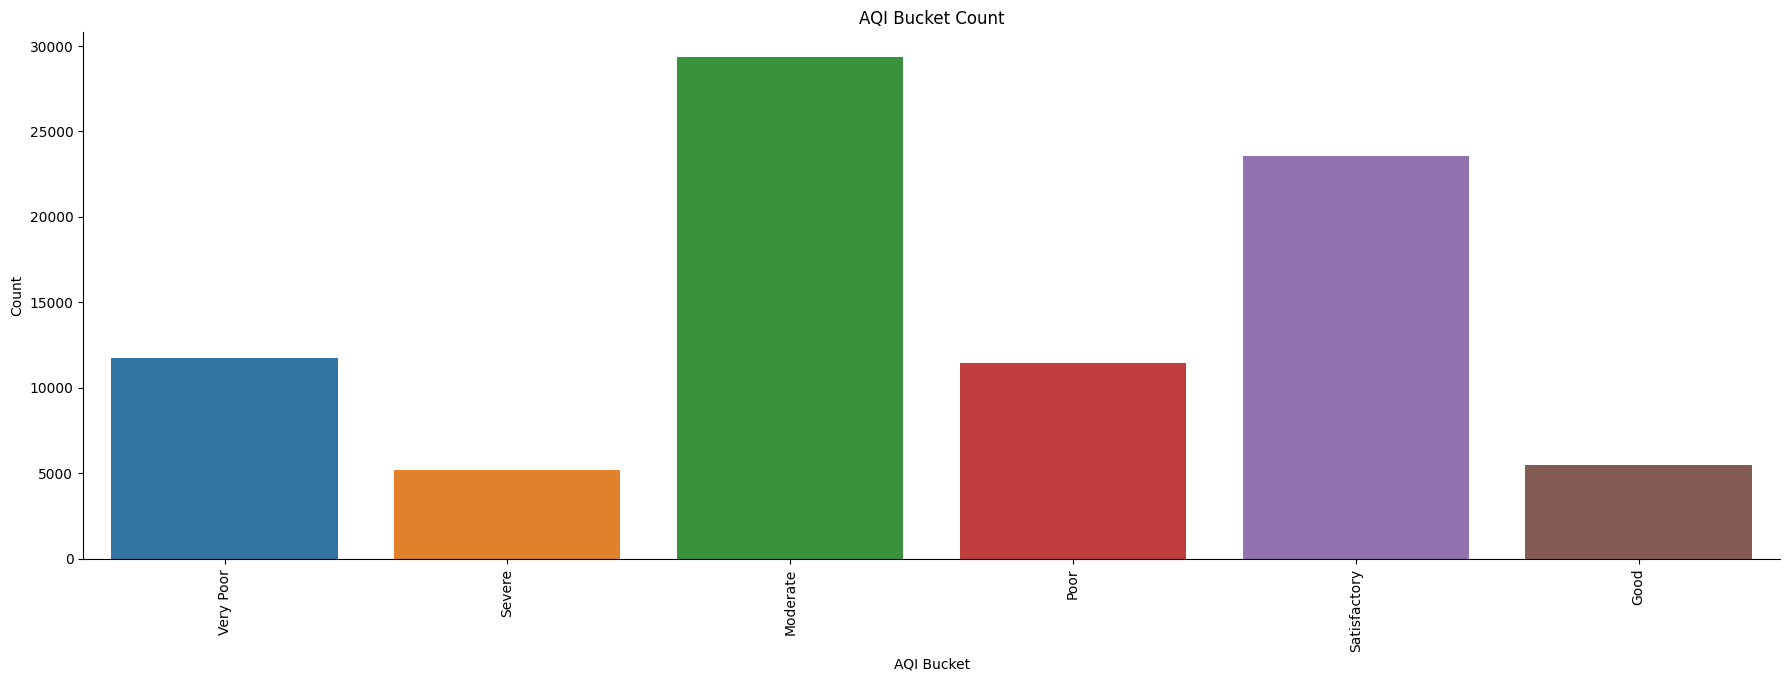

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot of AQI_Bucket
plot1 = sns.catplot(x="AQI_Bucket", data=df1, kind="count", height=6, aspect=3)
plot1.set_xticklabels(rotation=90)
plot1.set(title='AQI Bucket Count', xlabel='AQI Bucket', ylabel='Count')
plt.show()


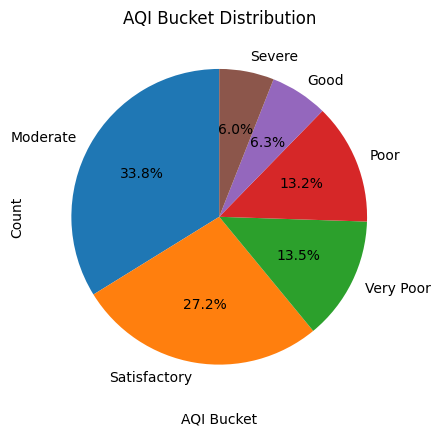

In [45]:
import matplotlib.pyplot as plt

# Count the number of observations for each AQI bucket and plot a pie chart with percentage labels
df['AQI_Bucket'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)

# Set the title and axis labels
plt.title('AQI Bucket Distribution')
plt.xlabel('AQI Bucket')
plt.ylabel('Count')

# Show the plot
plt.show()

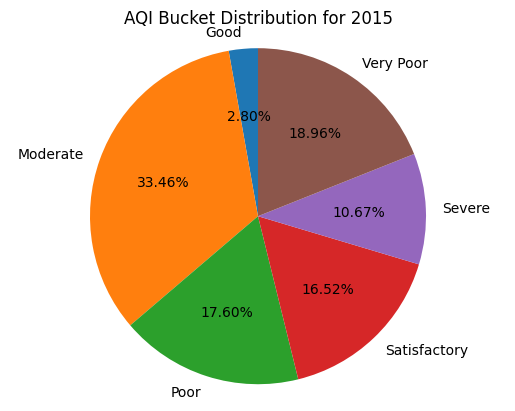

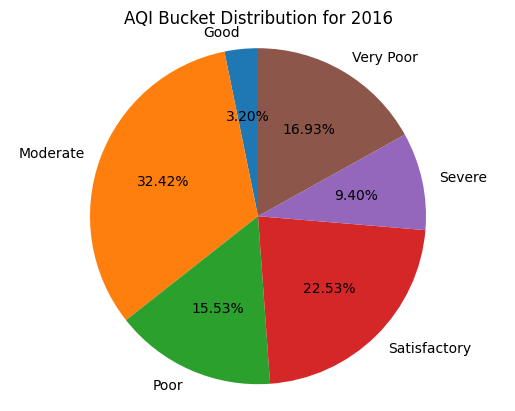

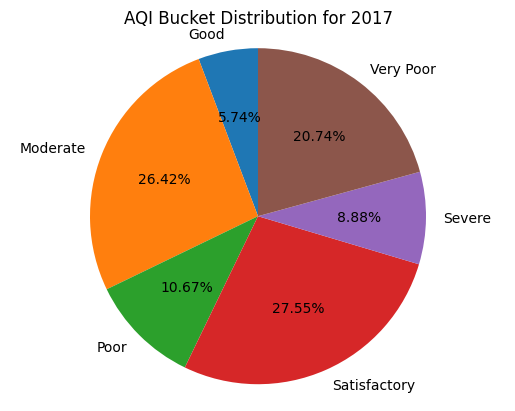

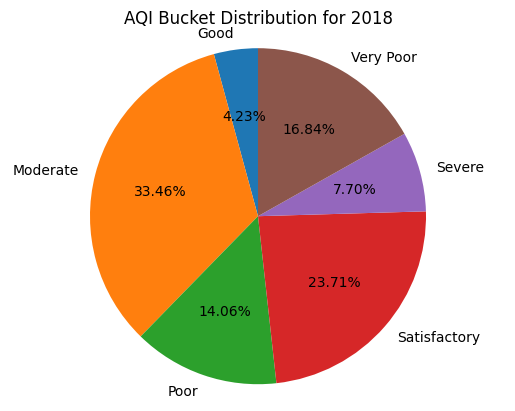

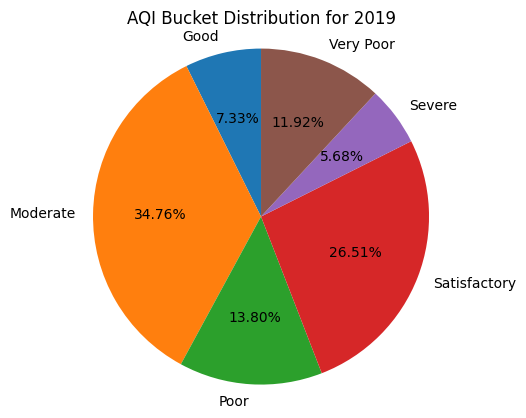

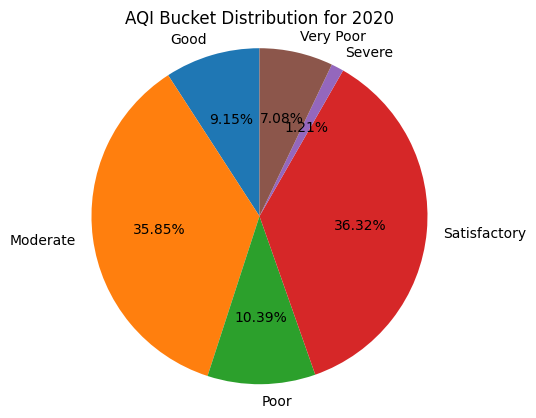

In [46]:
import matplotlib.pyplot as plt

# Group the data by year and AQI bucket and count the number of rows in each group
grouped = df.groupby(['Year', 'AQI_Bucket']).size().reset_index(name='Counts')

# Pivot the table so that each AQI bucket is a separate column
pivoted = grouped.pivot(index='Year', columns='AQI_Bucket', values='Counts')

# Plot a pie chart for each year
for year in pivoted.index:
    plt.figure()
    plt.pie(pivoted.loc[year], labels=pivoted.columns, autopct='%.2f%%', startangle=90)
    plt.title(f'AQI Bucket Distribution for {year}')
    plt.axis('equal')
    plt.show()


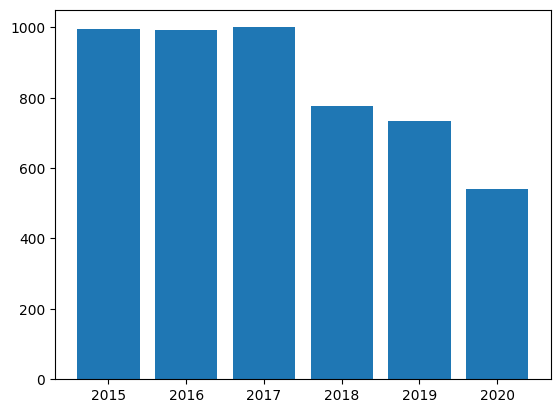

In [27]:
plt.bar(df['Year'], df['PM2.5'],label='PM2.5')
plt.show()

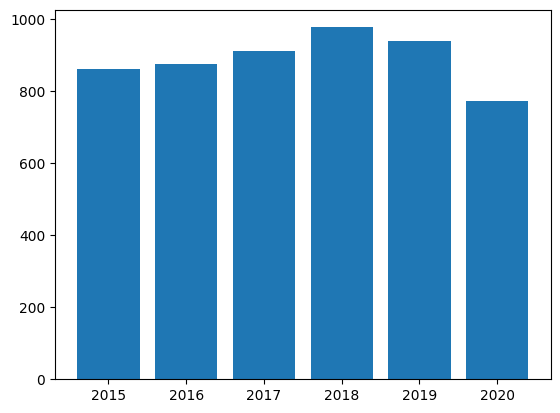

In [28]:
plt.bar(df['Year'], df['PM10'],label='PM10')
plt.show()

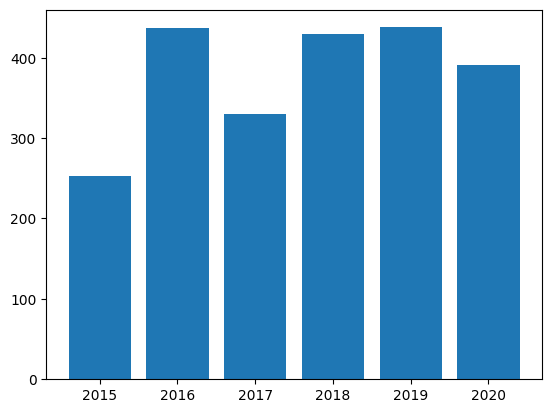

In [29]:
plt.bar(df['Year'], df['NO'],label='NO')
plt.show()

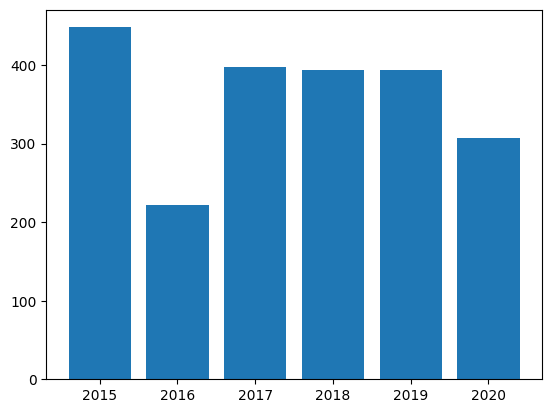

In [30]:
plt.bar(df['Year'], df['NO2'],label='NO2')
plt.show()

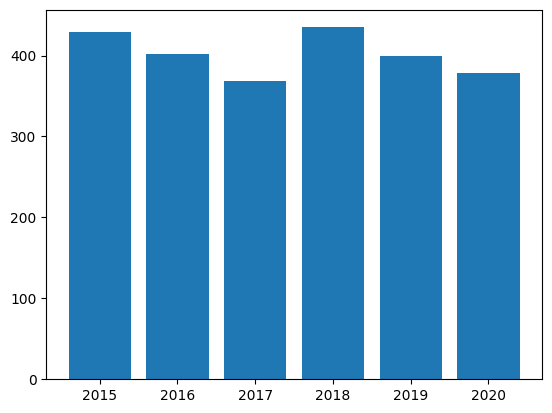

In [31]:
plt.bar(df['Year'], df['NOx'],label='NOx')
plt.show()

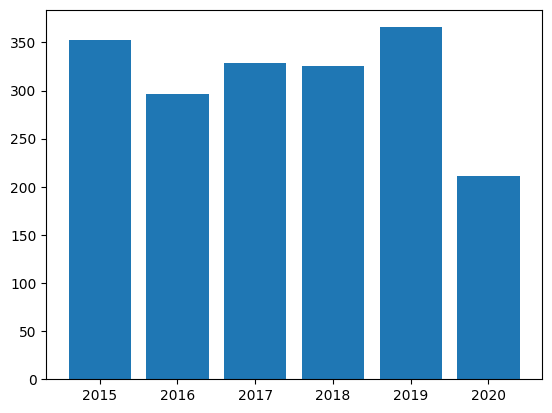

In [32]:
plt.bar(df['Year'], df['NH3'],label='NH3')
plt.show()

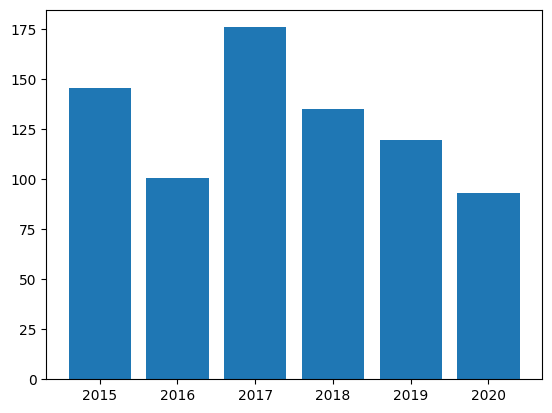

In [33]:
plt.bar(df['Year'], df['CO'],label='CO')
plt.show()

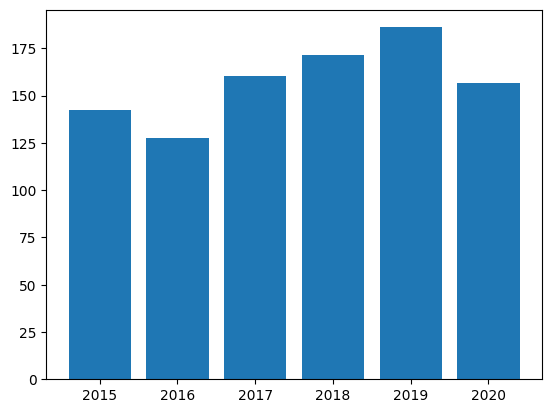

In [24]:
plt.bar(df['Year'], df['SO2'],label='SO2')
plt.show()

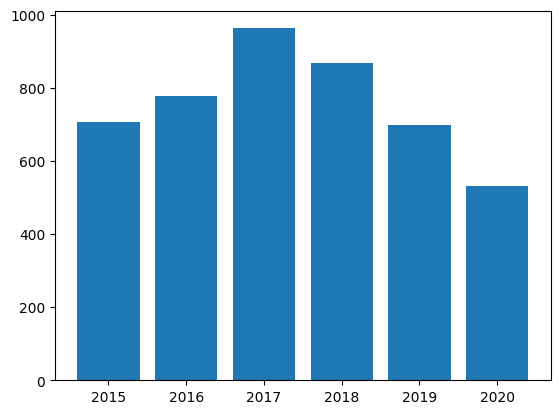

In [34]:
plt.bar(df['Year'], df['O3'],label='O3')
plt.show()

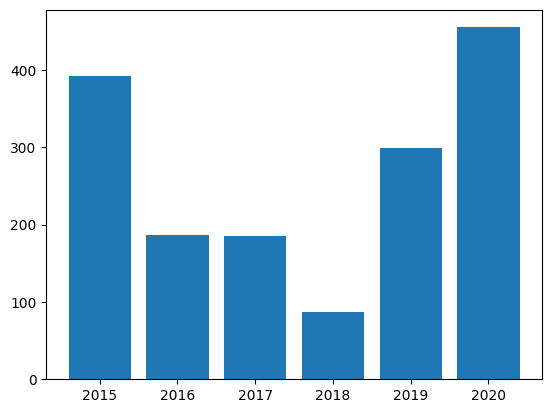

In [35]:
plt.bar(df['Year'], df['Benzene'],label='Benzene')
plt.show()

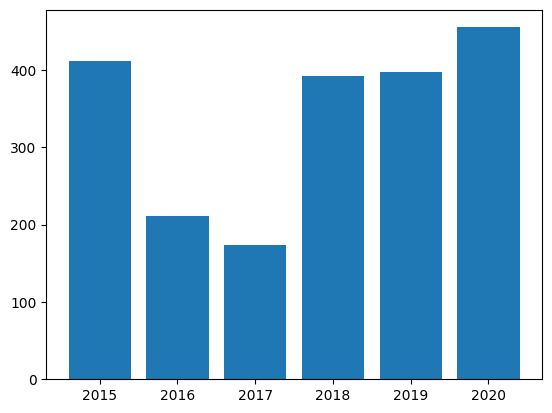

In [36]:
plt.bar(df['Year'], df['Toluene'],label='Toluene')
plt.show()

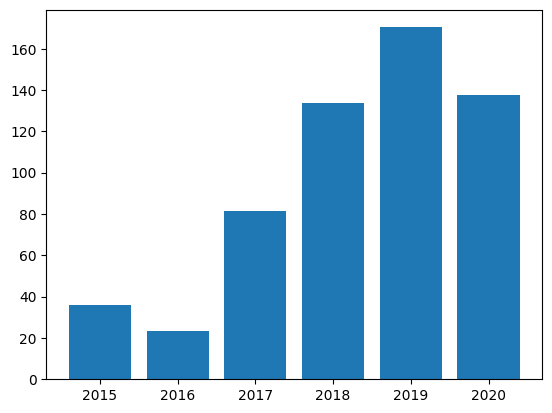

In [37]:
plt.bar(df['Year'], df['Xylene'],label='Xylene')
plt.show()

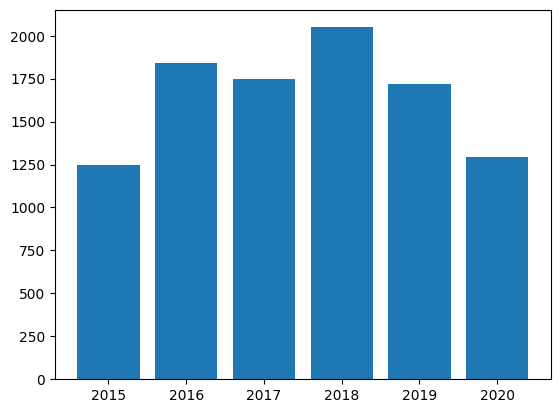

In [38]:
plt.bar(df['Year'], df['AQI'],label='AQI')
plt.show()

In [47]:
Station_wise_AQI = df[['StationId','AQI']].groupby(['StationId']).median().sort_values(['AQI']).reset_index()

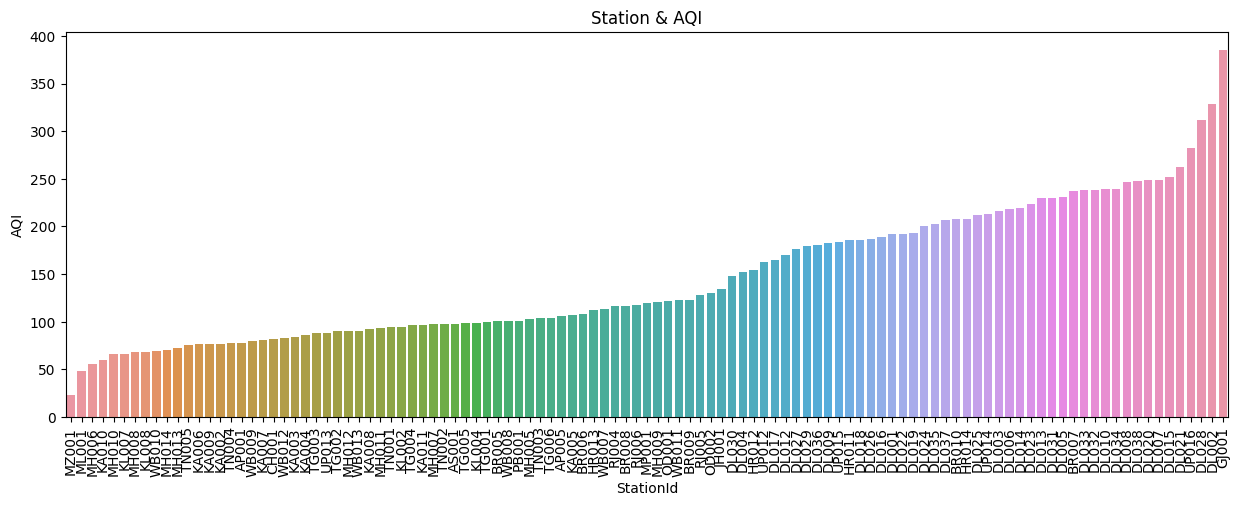

In [48]:
plt.figure(figsize=(15,5))
sns.barplot(x='StationId', y='AQI', data=Station_wise_AQI).set(title ='Station & AQI')
plt.xticks(rotation=90)
plt.show()

In [49]:
df.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year
0,DL013,2015-01-01,200.96,122.43,17.06,12.39,24.73,42.98,21.82,8.91,30.89,1.38,5.31,0.60,364.0,Very Poor,2015
1,DL007,2015-01-01,425.49,607.98,49.37,40.91,90.29,23.76,0.69,9.06,143.84,9.19,14.16,9.84,579.0,Severe,2015
2,DL007,2015-01-02,172.13,269.55,22.97,40.98,63.94,23.76,1.35,9.06,77.99,4.01,6.19,4.29,497.0,Severe,2015
3,DL013,2015-01-02,251.12,122.43,26.02,17.12,31.50,46.70,13.29,6.79,30.89,1.38,5.31,0.60,410.0,Severe,2015
4,DL013,2015-01-03,95.98,122.43,12.21,16.90,20.16,40.23,9.44,5.30,30.89,1.38,5.31,0.60,404.0,Severe,2015


# Model fitting

## Dropping the columns which are not needed

In [24]:
drop_col=df[['StationId','Date','AQI_Bucket']]
df.drop(drop_col,
          axis = 1,
          inplace = True)


### Get the sample

In [25]:
#df=df.sample(n=200000)

In [26]:
df.shape

(86754, 14)

In [52]:
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Year
0,200.96,122.43,17.06,12.39,24.73,42.98,21.82,8.91,30.89,1.38,5.31,0.60,364.0,2015
1,425.49,607.98,49.37,40.91,90.29,23.76,0.69,9.06,143.84,9.19,14.16,9.84,579.0,2015
2,172.13,269.55,22.97,40.98,63.94,23.76,1.35,9.06,77.99,4.01,6.19,4.29,497.0,2015
3,251.12,122.43,26.02,17.12,31.50,46.70,13.29,6.79,30.89,1.38,5.31,0.60,410.0,2015
4,95.98,122.43,12.21,16.90,20.16,40.23,9.44,5.30,30.89,1.38,5.31,0.60,404.0,2015


# Feature Selection


## Check Correlation

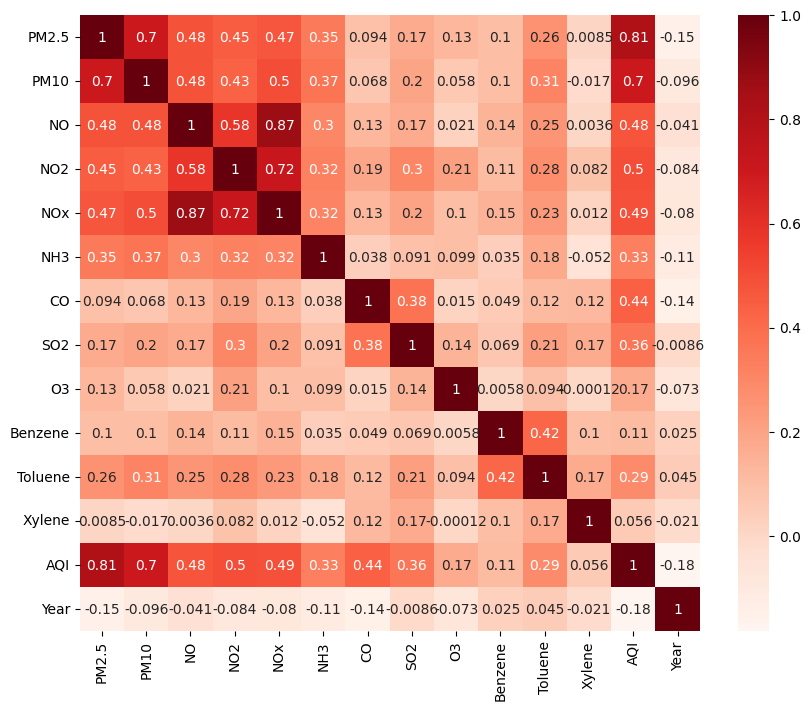

In [53]:

plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(10,8))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### Removing highly correlated values

In [27]:
df.drop(['NOx'],
          axis = 1,
          inplace = True)

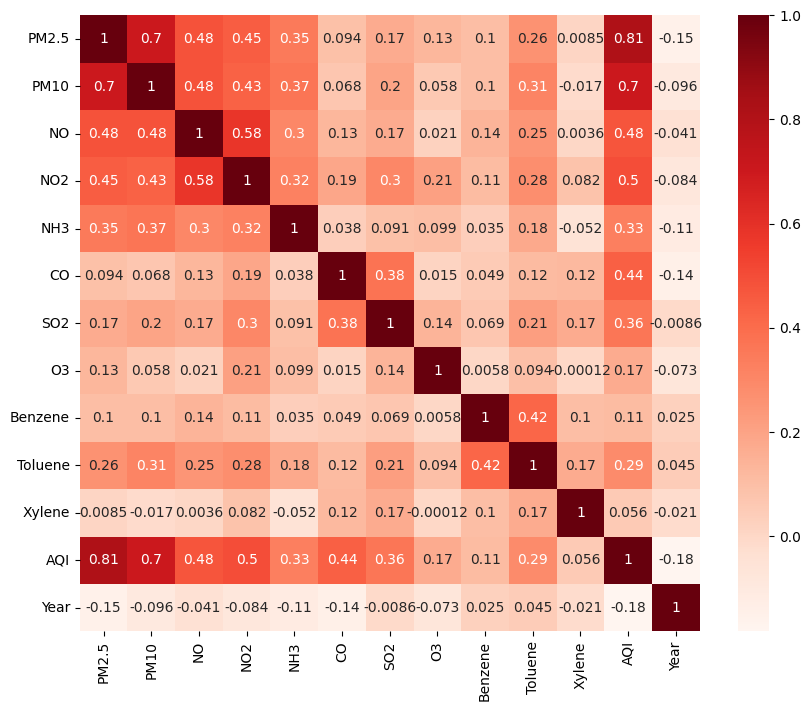

In [55]:
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(10,8))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [56]:
pd.DataFrame(df.corr()['AQI'].sort_values(ascending=False)).style.background_gradient(cmap='coolwarm')

,AQI
AQI,1.000000
PM2.5,0.811159
PM10,0.700669
NO2,0.496909
NO,0.475566
CO,0.440148
SO2,0.364518
NH3,0.330128
Toluene,0.287505
O3,0.170427


## remove the variable which is the low correlation between AQI and variable

In [28]:
df.drop(['Xylene'],
          axis = 1,
          inplace = True)

# Split the data set into two set , train_test_df and validation_df

In [29]:
train_test_df= df[(df["Year"] >= 2015) & (df["Year"] <= 2018)]

In [66]:
train_test_df

,PM2.5,PM10,NO,NO2,NH3,CO,SO2,O3,Benzene,Toluene,AQI,Year
0,200.96,122.43,17.06,12.39,42.98,21.82,8.91,30.89,1.38,5.31,364.0,2015
1,425.49,607.98,49.37,40.91,23.76,0.69,9.06,143.84,9.19,14.16,579.0,2015
2,172.13,269.55,22.97,40.98,23.76,1.35,9.06,77.99,4.01,6.19,497.0,2015
3,251.12,122.43,26.02,17.12,46.70,13.29,6.79,30.89,1.38,5.31,410.0,2015
4,95.98,122.43,12.21,16.90,40.23,9.44,5.30,30.89,1.38,5.31,404.0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
38631,313.30,122.43,47.83,70.00,61.23,2.37,12.48,30.89,1.38,5.31,476.0,2018
38632,287.46,432.33,79.67,62.71,41.40,2.24,10.13,31.45,8.57,5.31,450.0,2018
38633,56.17,413.78,7.07,7.47,6.69,0.95,71.01,18.74,1.38,5.31,341.0,2018
38634,327.06,454.07,137.44,31.69,89.97,2.94,3.41,9.23,0.70,1.83,492.0,2018


In [61]:
#validation_df=df.iloc[df_half:,]

In [30]:
validation_df= df[(df["Year"] > 2018) & (df["Year"] <= 2020)]

In [31]:
train_test_df.shape,validation_df.shape

((38636, 12), (48118, 12))

In [69]:
train_test_df

,PM2.5,PM10,NO,NO2,NH3,CO,SO2,O3,Benzene,Toluene,AQI,Year
0,200.96,122.43,17.06,12.39,42.98,21.82,8.91,30.89,1.38,5.31,364.0,2015
1,425.49,607.98,49.37,40.91,23.76,0.69,9.06,143.84,9.19,14.16,579.0,2015
2,172.13,269.55,22.97,40.98,23.76,1.35,9.06,77.99,4.01,6.19,497.0,2015
3,251.12,122.43,26.02,17.12,46.70,13.29,6.79,30.89,1.38,5.31,410.0,2015
4,95.98,122.43,12.21,16.90,40.23,9.44,5.30,30.89,1.38,5.31,404.0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
38631,313.30,122.43,47.83,70.00,61.23,2.37,12.48,30.89,1.38,5.31,476.0,2018
38632,287.46,432.33,79.67,62.71,41.40,2.24,10.13,31.45,8.57,5.31,450.0,2018
38633,56.17,413.78,7.07,7.47,6.69,0.95,71.01,18.74,1.38,5.31,341.0,2018
38634,327.06,454.07,137.44,31.69,89.97,2.94,3.41,9.23,0.70,1.83,492.0,2018


In [70]:
validation_df

,PM2.5,PM10,NO,NO2,NH3,CO,SO2,O3,Benzene,Toluene,AQI,Year
38636,61.05,208.87,49.44,48.86,20.49,1.63,13.78,44.72,2.55,5.31,188.0,2019
38637,166.59,453.41,104.43,65.14,55.90,2.81,19.33,18.98,7.99,54.83,548.0,2019
38638,80.98,122.43,3.36,25.94,23.76,0.80,4.30,69.06,0.00,0.00,266.0,2019
38639,110.71,122.43,63.03,111.56,23.76,63.03,80.15,57.12,4.08,32.33,1474.0,2019
38640,75.15,167.29,35.75,90.51,16.23,1.60,6.17,27.10,5.05,49.32,151.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
86749,56.17,68.62,174.74,12.22,23.76,0.53,1.53,20.69,1.31,3.48,198.0,2020
86750,72.50,189.50,3.42,35.77,24.42,0.38,3.67,14.57,2.42,81.18,115.0,2020
86751,46.00,123.00,0.32,8.85,21.12,3.55,7.72,30.38,1.75,6.85,120.0,2020
86752,40.00,53.00,0.55,6.59,5.02,0.61,16.07,21.32,0.00,5.31,36.0,2020


In [32]:
train_test_df.drop(['Year'],
          axis = 1,
          inplace = True)

In [33]:
train_test_df.head()

,PM2.5,PM10,NO,NO2,NH3,CO,SO2,O3,Benzene,Toluene,AQI
0,200.96,122.43,17.06,12.39,42.98,21.82,8.91,30.89,1.38,5.31,364.0
1,425.49,607.98,49.37,40.91,23.76,0.69,9.06,143.84,9.19,14.16,579.0
2,172.13,269.55,22.97,40.98,23.76,1.35,9.06,77.99,4.01,6.19,497.0
3,251.12,122.43,26.02,17.12,46.70,13.29,6.79,30.89,1.38,5.31,410.0
4,95.98,122.43,12.21,16.90,40.23,9.44,5.30,30.89,1.38,5.31,404.0


In [34]:
#split train_test_df into feature and target
x = train_test_df.drop('AQI',axis=1)
y = train_test_df["AQI"]

### visualize the data distriution of response variable vs explanotary variables

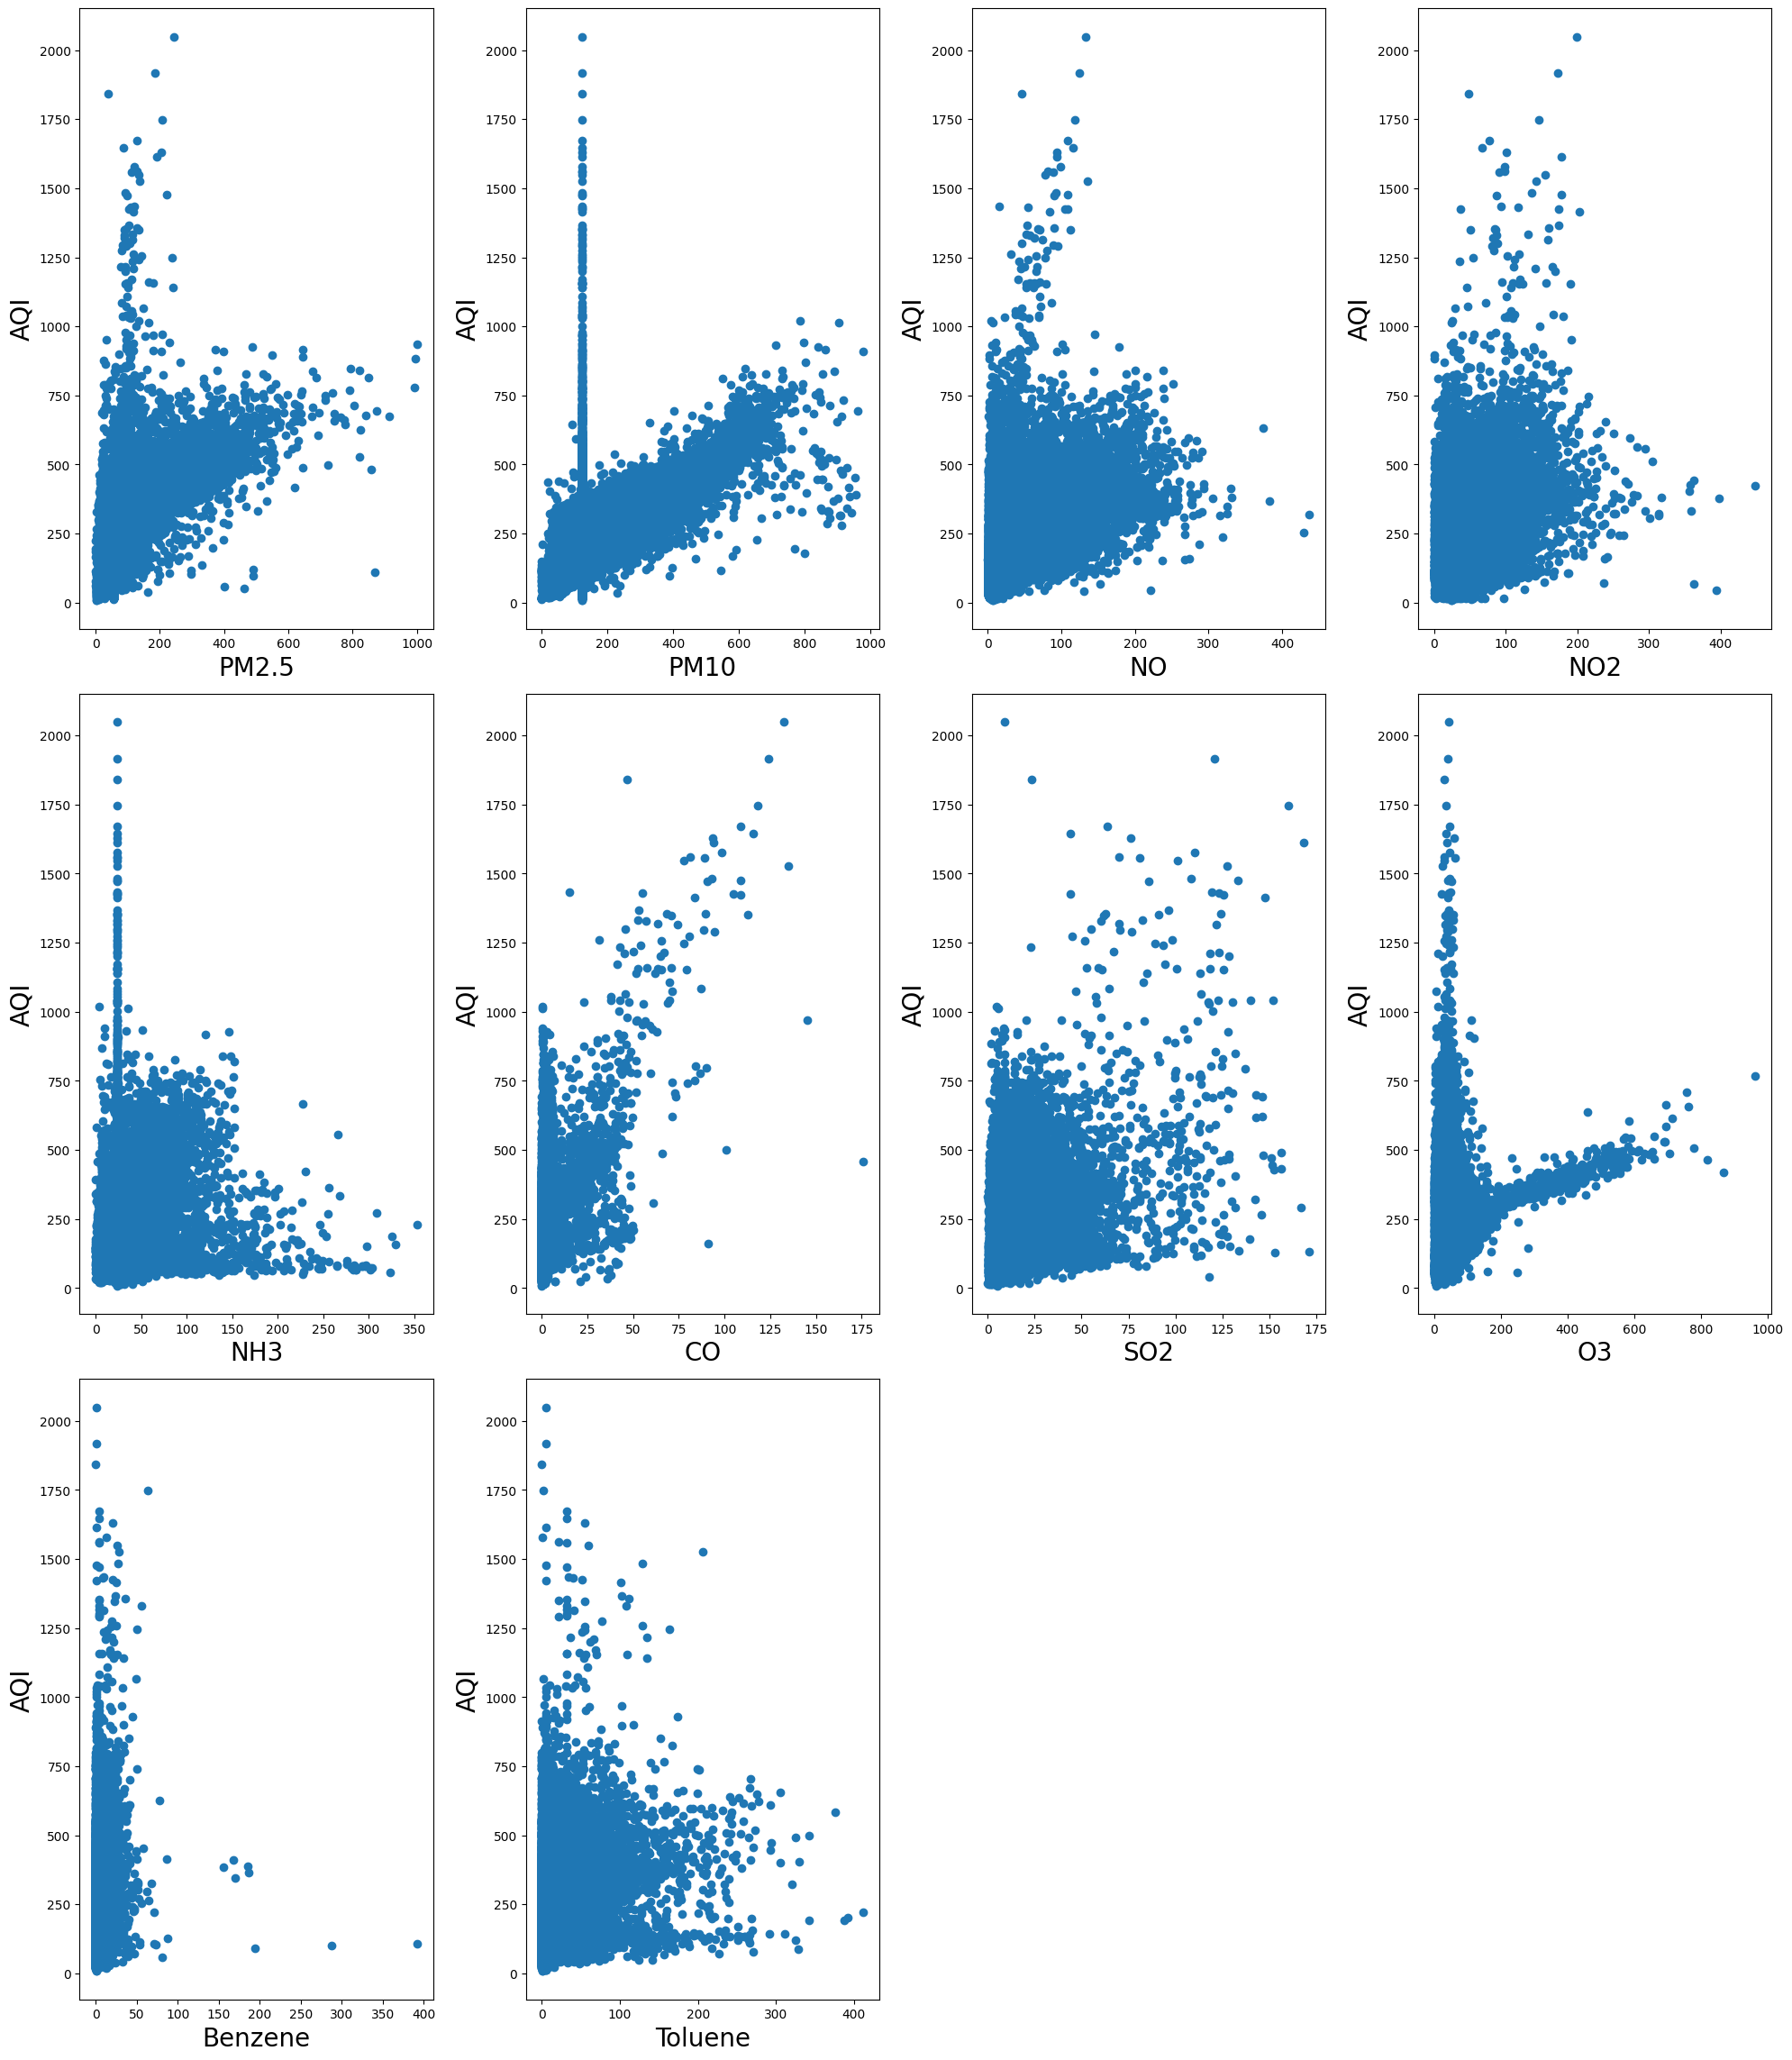

In [74]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('AQI',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample

## split dataset

In [39]:

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, shuffle=False)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((27045, 10), (11591, 10), (27045,), (11591,))

In [77]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [78]:
dtr = DecisionTreeRegressor()
ran = RandomForestRegressor(n_estimators=20)
lin = LinearRegression()

## Fit the Random Forest Regession model

In [79]:
ran.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20)

In [80]:
y_pred=ran.predict(X_test)

In [81]:
from sklearn import metrics
print('R^2:',metrics.r2_score(y_test, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.9391669470782076
Adjusted R^2: 0.9391444446542518
MAE: 22.637403624723422
MSE: 1407.2808815751469
RMSE: 37.51374256955905


## Fit the Linear Regression Model

In [82]:
lin.fit(X_train, y_train)

LinearRegression()

In [83]:
y_pred=lin.predict(X_test)

In [84]:
from sklearn import metrics
print('R^2:',metrics.r2_score(y_test, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.876901830421788
Adjusted R^2: 0.8768562958469645
MAE: 36.6431718368321
MSE: 2847.6903966503855
RMSE: 53.363755458648015


## Fit the Decision Tree Regression

In [85]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [86]:
y_pred=dtr.predict(X_test)

In [87]:
from sklearn import metrics
print('R^2:',metrics.r2_score(y_test, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.8508822632874474
Adjusted R^2: 0.8508271039559713
MAE: 34.13735656975239
MSE: 3449.6138184798547
RMSE: 58.73341313494266


#### We can see that our Random Forest Regression model made the most accurate predictions

## standadize the data and cheack the accuracy 

In [88]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

In [89]:
#split dataset
X_train, X_test, y_train, y_test = train_test_split(x_scaled,y,test_size = 0.3, shuffle=False)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((27045, 10), (11591, 10), (27045,), (11591,))

In [90]:
ran.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20)

In [91]:
y_pred=ran.predict(X_test)

In [92]:
from sklearn import metrics
print('R^2:',metrics.r2_score(y_test, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.9383571925518217
Adjusted R^2: 0.9383343905959705
MAE: 22.57755301047748
MSE: 1426.0133306142682
RMSE: 37.762591682964086


##### So we can see not improve the R^2 value

## Hyperparameter tuning

In [93]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 200],
              'max_features': ['auto', 'sqrt', 'log2']}



grid_search = GridSearchCV(estimator=ran,
                           param_grid=param_grid, cv=5)



In [94]:
grid_fit=grid_search.fit(X_train, y_train)


In [95]:
best_model=grid_fit.best_estimator_
best_model

RandomForestRegressor(max_features='sqrt')

In [96]:
y_pred=best_model.predict(X_test)

In [97]:
from sklearn import metrics
print('R^2:',metrics.r2_score(y_test, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.9361180273536134
Adjusted R^2: 0.9360943971203344
MAE: 22.802717633268774
MSE: 1477.8130385490012
RMSE: 38.4423339373275


In [35]:

validation_df.drop(['Year'],
          axis = 1,
          inplace = True)

## test the validation_df

In [36]:
#split validation_df into feature and target
x_valid = validation_df.drop('AQI',axis=1)
y_valid = validation_df["AQI"]

In [100]:
x_valid=scalar.fit_transform(x_valid)

In [101]:
y_pred=best_model.predict(x_valid)

In [102]:
y_pred

array([208.36, 500.2 , 241.71, ..., 211.11,  80.73,  82.25])

In [126]:
from sklearn import metrics
print('R^2:',metrics.r2_score(y_valid, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_valid, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_valid, y_pred))
print('MSE:',metrics.mean_squared_error(y_valid, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))

R^2: 0.7133364914540159
Adjusted R^2: 0.7132304533136941
MAE: 51.777472215677165
MSE: 3878.070090093487
RMSE: 62.27415266459663


## The accuracy was decressing 0.93611 to 0.71333, so we can say that the model is drifted

In [40]:
train,test=train_test_split(train_test_df,test_size=0.3,shuffle=False)

In [41]:
def Prob_train(feature):
    l = []
    for j in train[train.columns[feature]].unique().tolist():
        l.append((train[train.columns[feature]].value_counts()[j])/train.shape[0])
    return l

def Prob_test(feature):
    l = []
    for j in test[test.columns[feature]].unique().tolist():
        l.append((test[test.columns[feature]].value_counts()[j])/test.shape[0])
    return l

def train_distribution(feature):
    Feature_prob = {}
    for u,r in zip(train[train.columns[feature]].unique().tolist(),Prob_train(feature)):
        Feature_prob[u] = r
    return Feature_prob
        
def test_distribution(feature):
    Feature_prob = {}
    for u,r in zip(test[test.columns[feature]].unique().tolist(),Prob_test(feature) ):
        Feature_prob[u] = r
    return Feature_prob

def train_events(feature):
    return train[train.columns[feature]].unique().tolist()

def test_events(feature):
    return test[test.columns[feature]].unique().tolist()

In [42]:
def Prob_train_normal(feature):
    l = []
    for j in train_test_df[train_test_df.columns[1]].unique().tolist():
        if list(set(train[train.columns[feature]].tolist())).__contains__(j) == False:
            l.append(0.000001)
        else:
            l.append((train[train.columns[feature]].value_counts()[j])/train.shape[0])
    return l

def Prob_test_normal(feature):
    l = []
    for j in train_test_df[train_test_df.columns[1]].unique().tolist():
        if list(set(test[test.columns[feature]].tolist())).__contains__(j) == False:
            l.append(0.000001)
        else:
            l.append((test[test.columns[feature]].value_counts()[j])/test.shape[0])
    return l

In [43]:
def distribution_plot(feature):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
    font = {'family':'serif','color':'blue','size':15}
    axes[0].bar(train_events(feature), Prob_train(feature))
    axes[0].set(xlabel=train.columns[feature], ylabel='Probability')
    axes[0].set_title("Train",fontdict = font)

    axes[1].bar(test_events(feature), Prob_test(feature))
    axes[1].set(xlabel=test.columns[feature], ylabel='Probability')
    axes[1].set_title("Test",fontdict = font)
    return fig.tight_layout() 

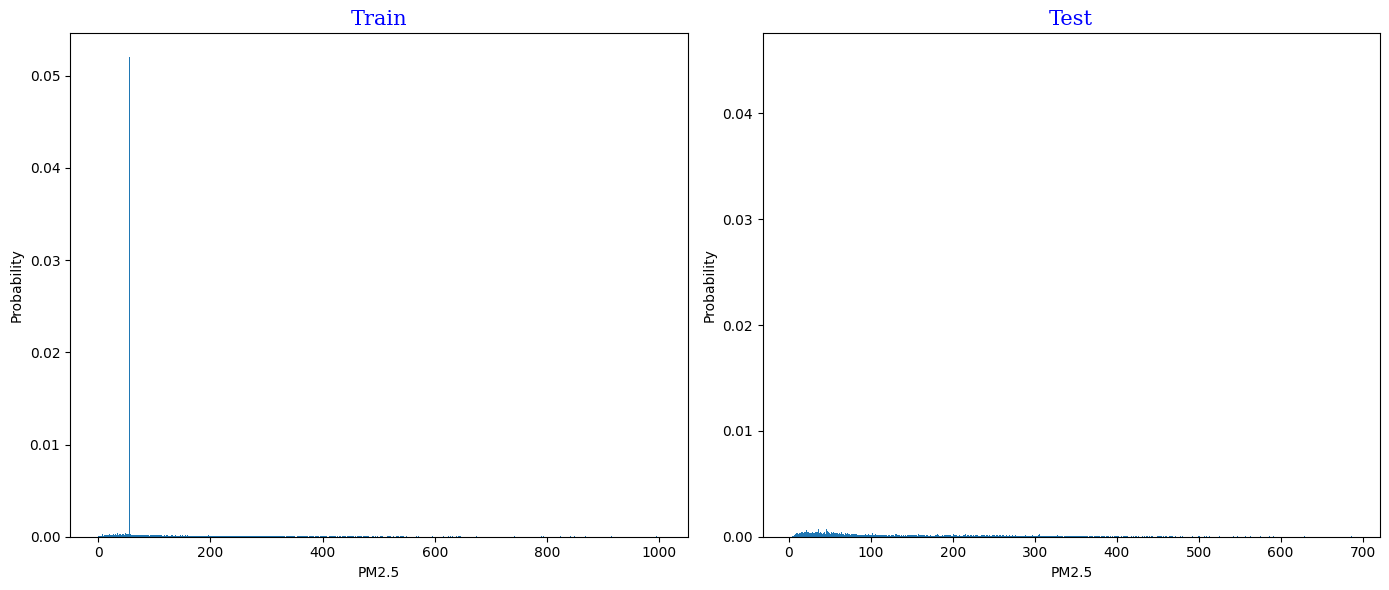

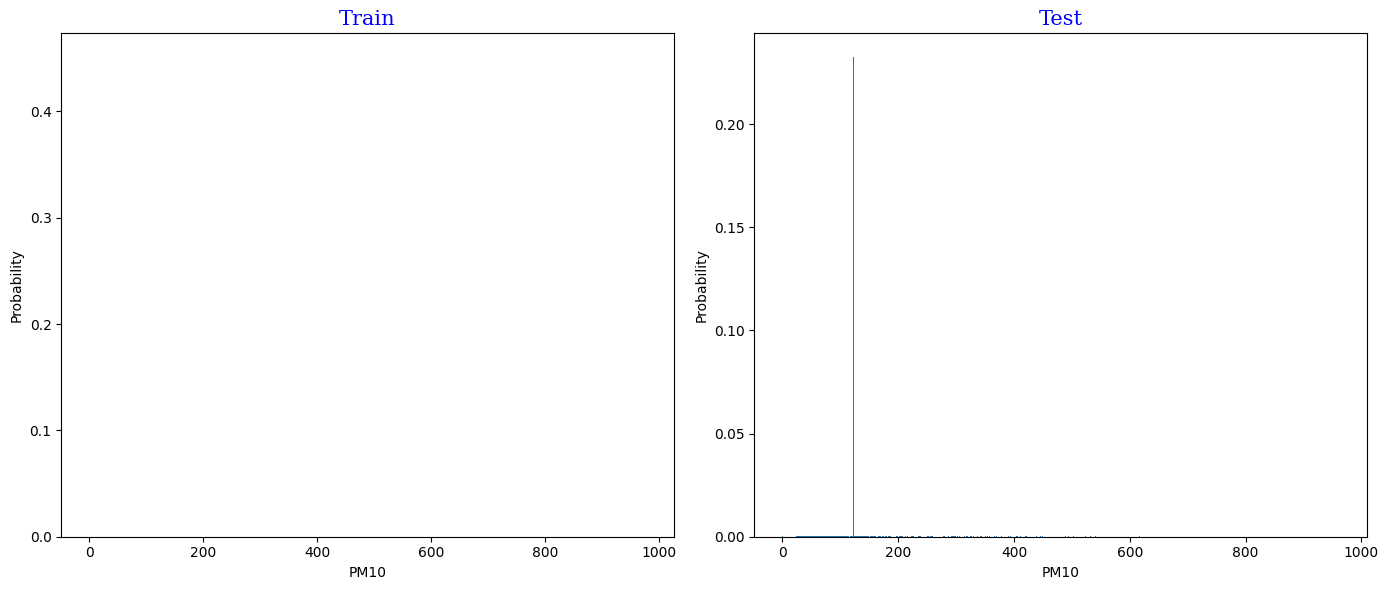

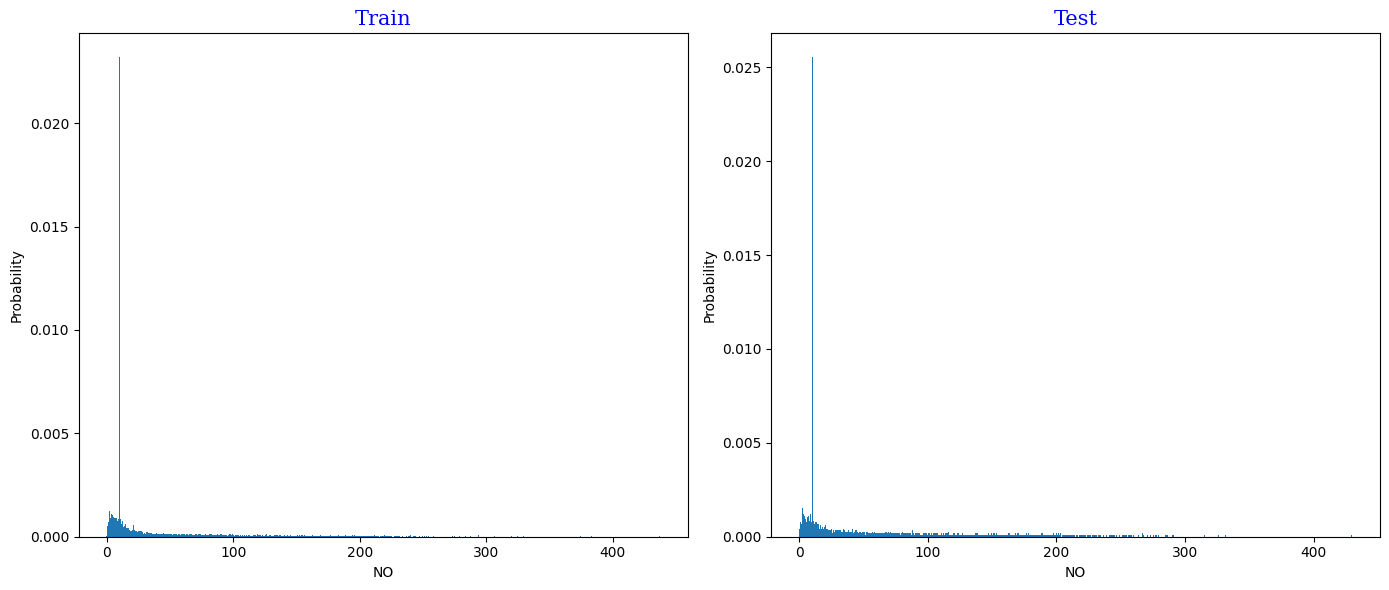

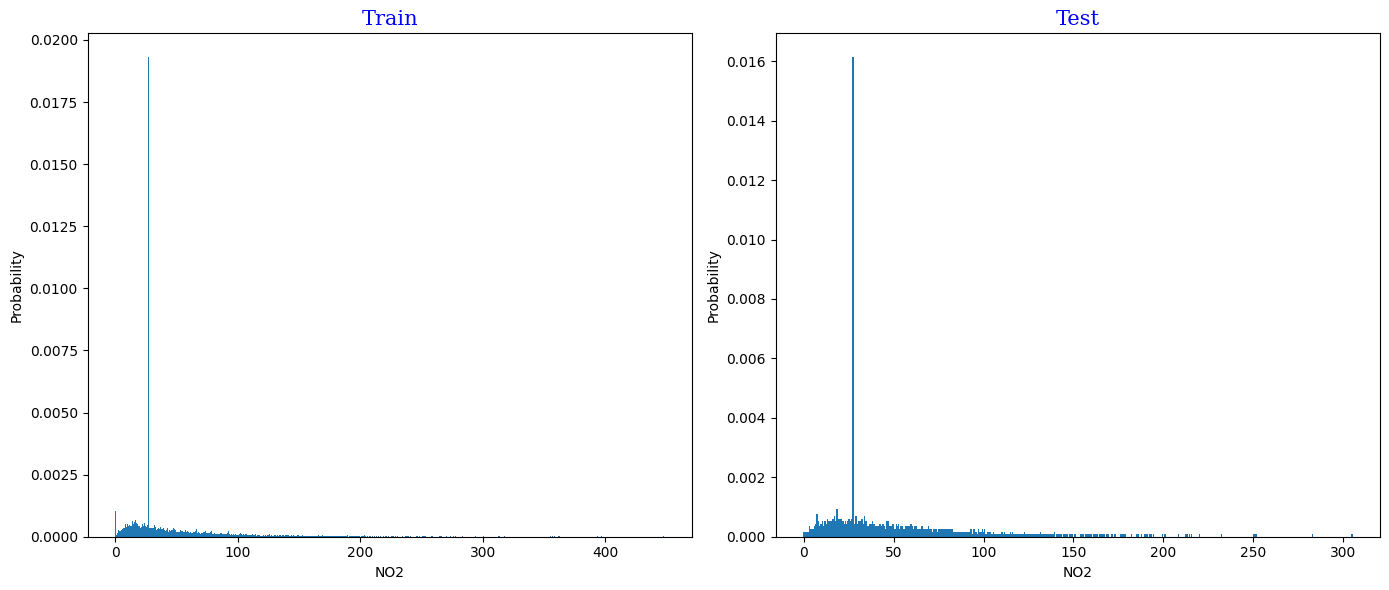

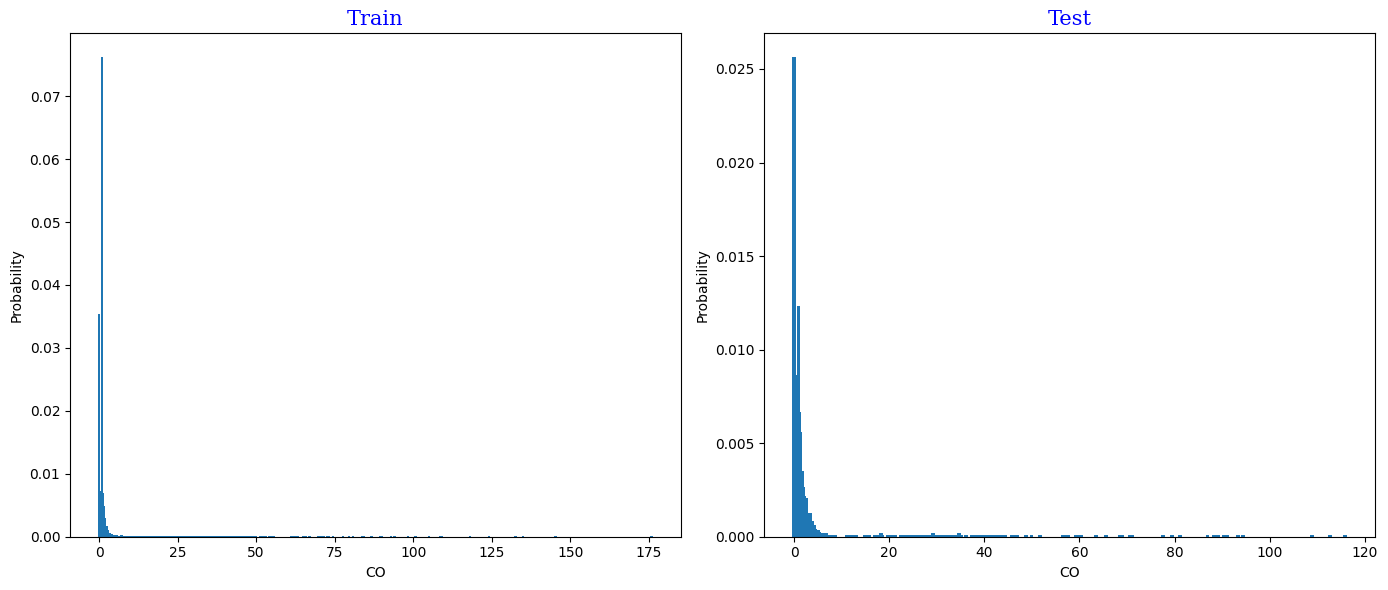

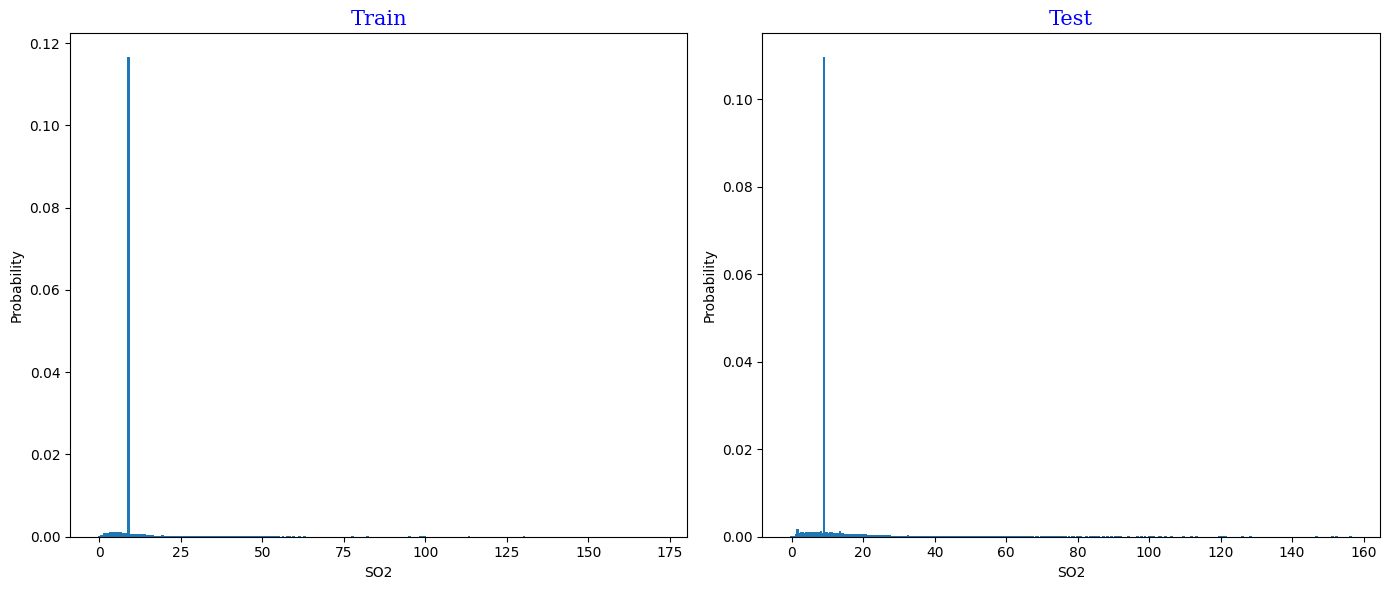

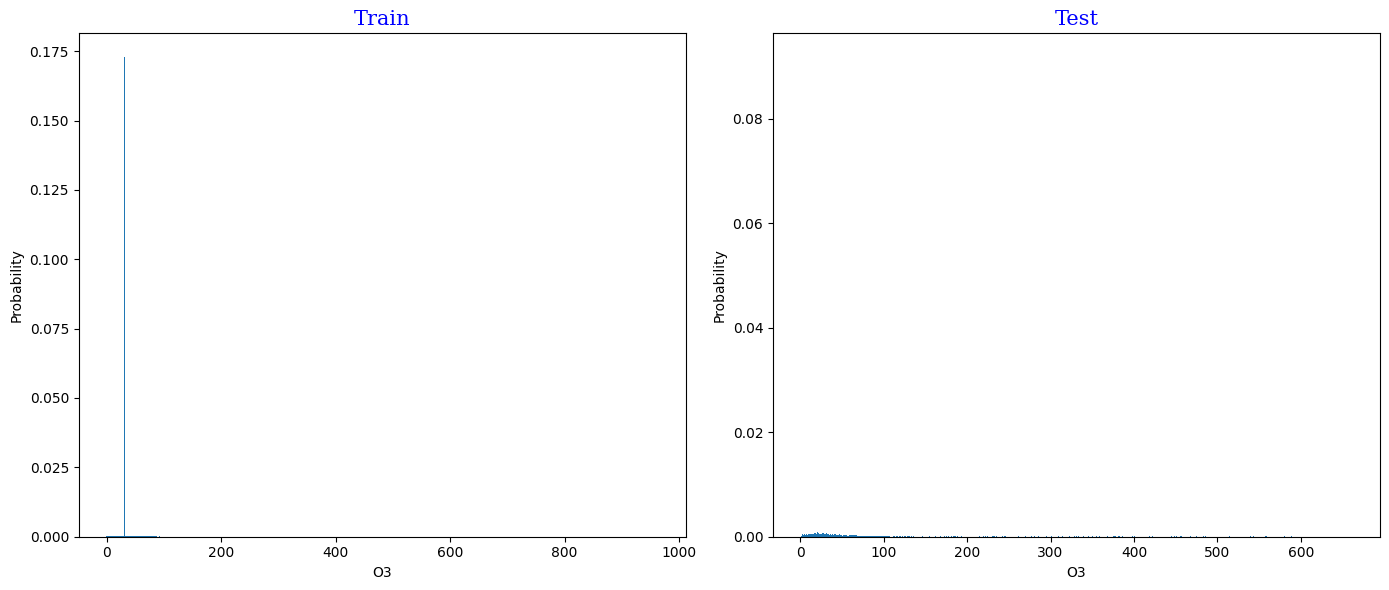

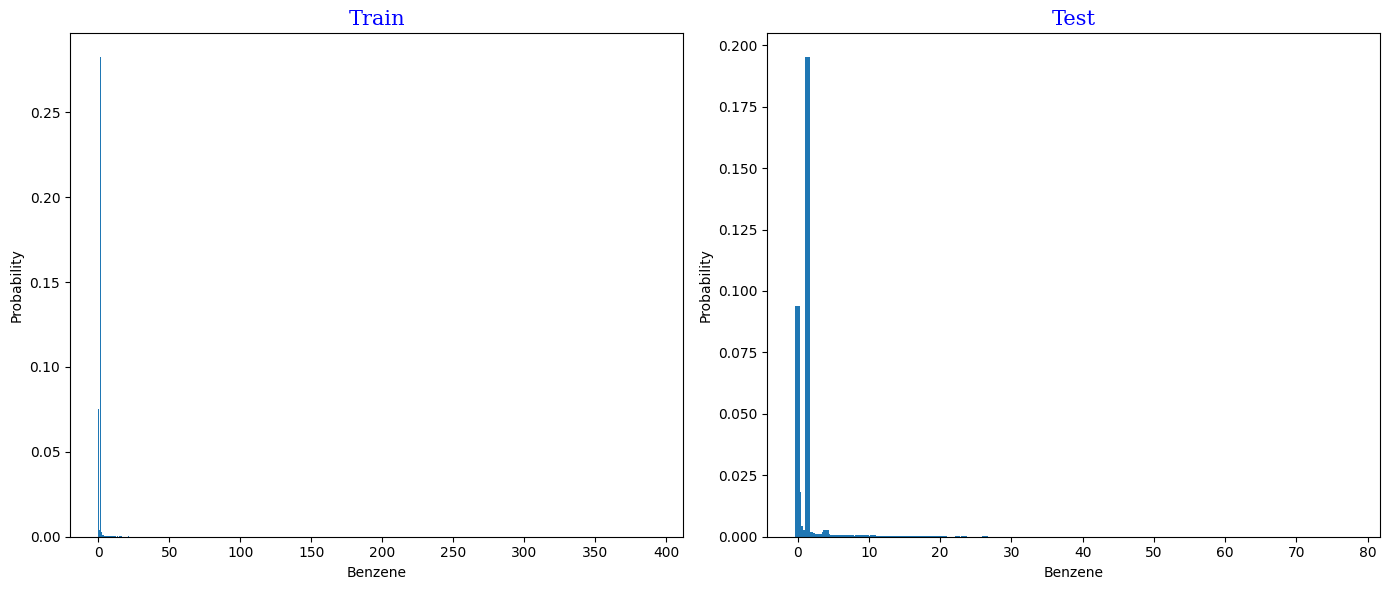

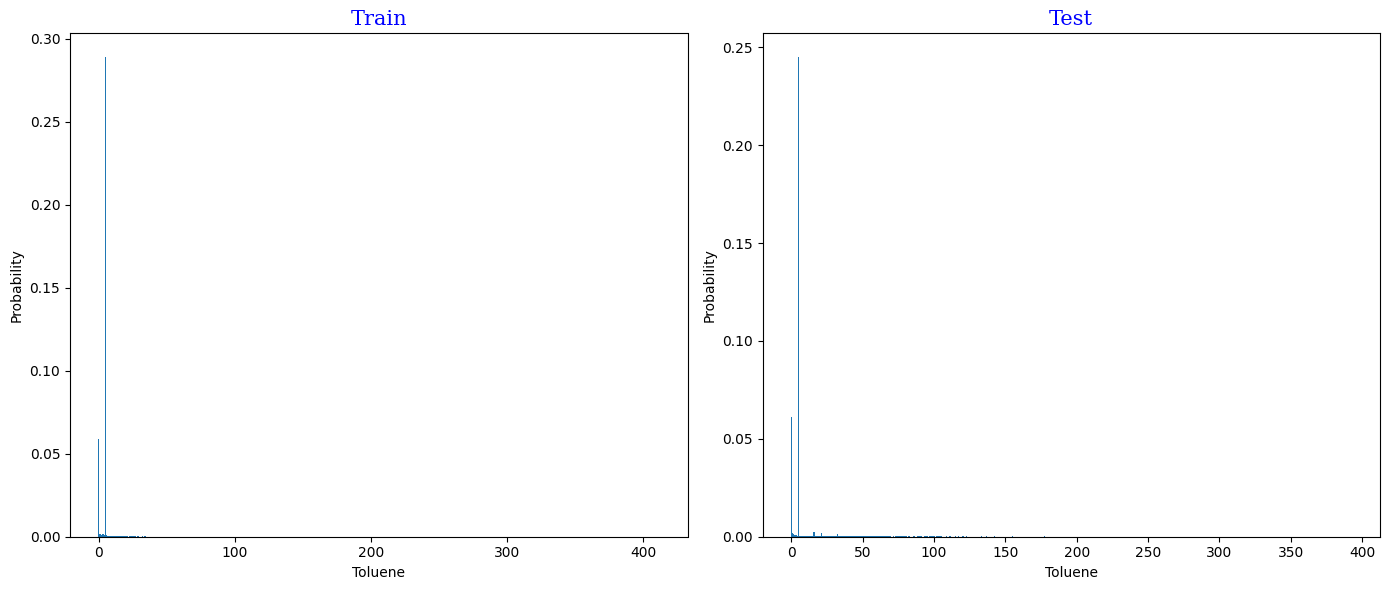

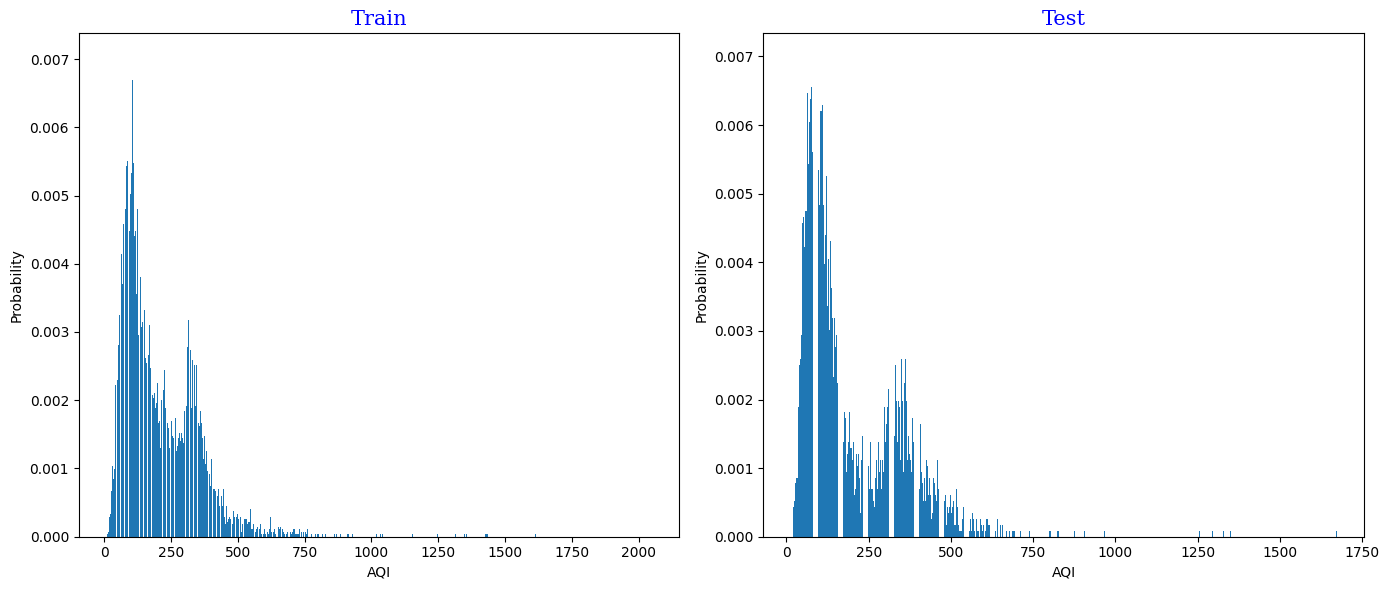

In [44]:
import matplotlib.pyplot as plt
for i in range(train_test_df.shape[1]):
    if i !=4:
        distribution_plot(i)

 ## Kullback-Leibler Divergence

In [133]:
from math import log2
def kl_divergence(p, q):
    return sum(p[i] * log2(p[i]/q[i]) for i in range(len(p)))

In [134]:
KL_divergences = []
for i in range(train_test_df.shape[1]):
    KL_divergences.append(kl_divergence(Prob_train_normal(i),Prob_test_normal(i)))
    print('KL(Prob_train || Prob_test) for %s is: %.3f bits' % (train_test_df.columns[i],kl_divergence(Prob_train_normal(i),Prob_test_normal(i))))

KL(Prob_train || Prob_test) for PM2.5 is: 1.692 bits
KL(Prob_train || Prob_test) for PM10 is: 2.683 bits
KL(Prob_train || Prob_test) for NO is: 0.480 bits
KL(Prob_train || Prob_test) for NO2 is: 0.815 bits
KL(Prob_train || Prob_test) for NH3 is: 0.507 bits
KL(Prob_train || Prob_test) for CO is: 0.046 bits
KL(Prob_train || Prob_test) for SO2 is: 0.242 bits
KL(Prob_train || Prob_test) for O3 is: 0.896 bits
KL(Prob_train || Prob_test) for Benzene is: 0.075 bits
KL(Prob_train || Prob_test) for Toluene is: 0.158 bits
KL(Prob_train || Prob_test) for AQI is: 0.045 bits


### These values suggest that the probability distributions of PM2.5 and PM10 in the training and test data are significantly different, with KL divergences of 1.692 and 2.683 bits, respectively. The other pollutants have lower KL divergences, indicating that their probability distributions in the training and test data are more similar.

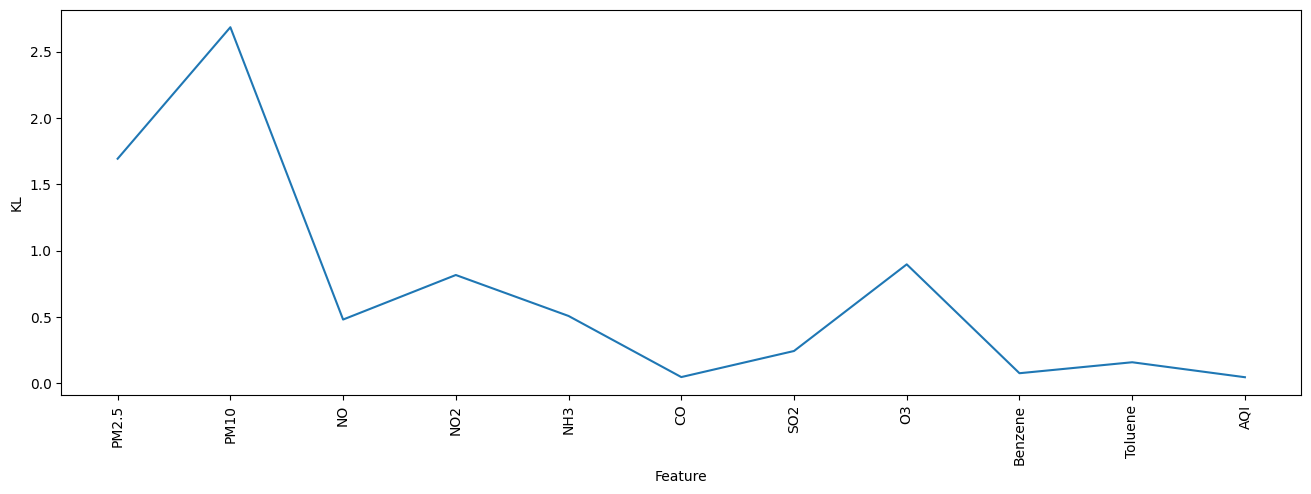

In [135]:
plt.figure(figsize=(16, 5))
plt.plot(train_test_df.columns.tolist(), KL_divergences)
plt.xlabel("Feature")
plt.ylabel("KL")
plt.xticks(train_test_df.columns.tolist(),rotation=90)
plt.show()

## Jensen-Shannon Divergence

In [136]:
from scipy.spatial import distance
js_divergences = []
for i in range(train_test_df.shape[1]):
    js_divergences.append(distance.jensenshannon(Prob_train_normal(i),Prob_test_normal(i)))
    print('JSD(Prob_train || Prob_test) for %s is: %.5f bits' % (train_test_df.columns[i],distance.jensenshannon(Prob_train_normal(i),
                                                                        Prob_test_normal(i))))

JSD(Prob_train || Prob_test) for PM2.5 is: 0.55188 bits
JSD(Prob_train || Prob_test) for PM10 is: 0.57118 bits
JSD(Prob_train || Prob_test) for NO is: 0.55776 bits
JSD(Prob_train || Prob_test) for NO2 is: 0.46049 bits
JSD(Prob_train || Prob_test) for NH3 is: 0.50498 bits
JSD(Prob_train || Prob_test) for CO is: 0.29842 bits
JSD(Prob_train || Prob_test) for SO2 is: 0.46550 bits
JSD(Prob_train || Prob_test) for O3 is: 0.45660 bits
JSD(Prob_train || Prob_test) for Benzene is: 0.25724 bits
JSD(Prob_train || Prob_test) for Toluene is: 0.54424 bits
JSD(Prob_train || Prob_test) for AQI is: 0.12562 bits


### For each pollutant, the JSD value indicates how different the probability distribution of that pollutant is in the training dataset compared to the testing dataset. A higher JSD value indicates a larger difference between the two distributions.

### Based on the values you provided, it appears that the pollutants with the highest JSD values (i.e., the largest differences between the training and testing distributions) are PM10, NO, and PM2.5. In contrast, the pollutants with the lowest JSD values are AQI, Benzene, and CO.

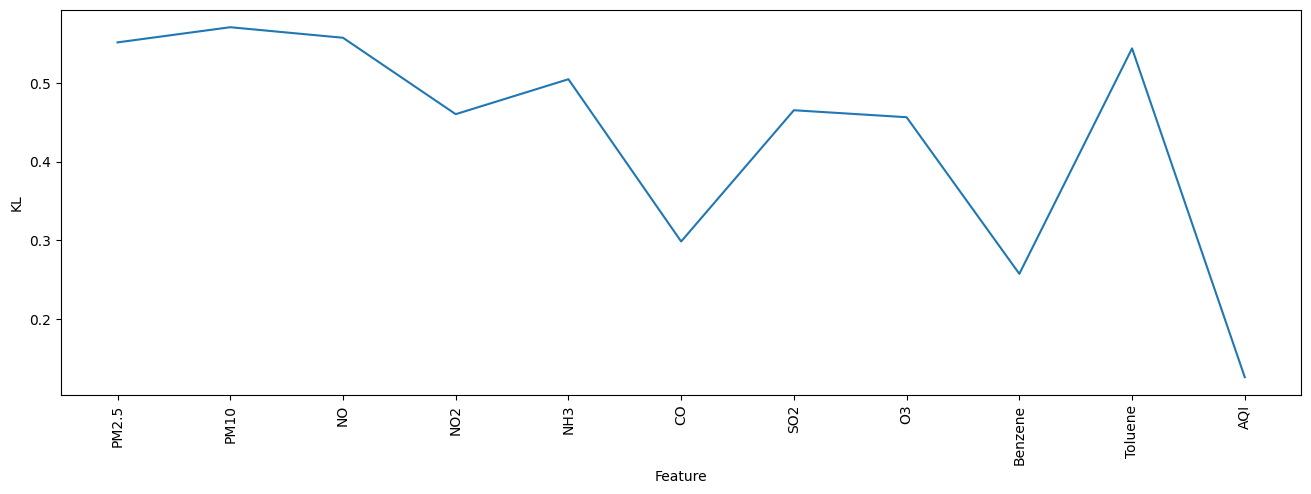

In [137]:
plt.figure(figsize=(16, 5))
plt.plot(train_test_df.columns.tolist(), js_divergences)
plt.xlabel("Feature")
plt.ylabel("KL")
plt.xticks(train_test_df.columns.tolist(),rotation=90)
plt.show()

In [ ]:
df.drop(['Year'],
          axis = 1,
          inplace = True)

## Check Kullback-Leibler Divergence and Jensen-Shannon Divergence for validation set

In [49]:
def Prob_train_test(feature):
    l = []
    for j in train_test_df[train_test_df.columns[feature]].unique().tolist():
        l.append((train_test_df[train_test_df.columns[feature]].value_counts()[j])/train_test_df.shape[0])
    return l

def Prob_valid(feature):
    l = []
    for j in validation_df[validation_df.columns[feature]].unique().tolist():
        l.append((validation_df[validation_df.columns[feature]].value_counts()[j])/validation_df.shape[0])
    return l

def train_test_distribution(feature):
    Feature_prob = {}
    for u,r in zip(train_test_df[train_test_df.columns[feature]].unique().tolist(),Prob_train(feature)):
        Feature_prob[u] = r
    return Feature_prob
        
def valid_distribution(feature):
    Feature_prob = {}
    for u,r in zip(validation_df[validation_df.columns[feature]].unique().tolist(),Prob_test(feature) ):
        Feature_prob[u] = r
    return Feature_prob

def train_test_events(feature):
    return train_test_df[train_test_df.columns[feature]].unique().tolist()

def valid_events(feature):
    return validation_df[validation_df.columns[feature]].unique().tolist()

In [50]:
def Prob_train_test_normal(feature):
    l = []
    for j in df[df.columns[1]].unique().tolist():
        if list(set(train_test_df[train_test_df.columns[feature]].tolist())).__contains__(j) == False:
            l.append(0.000001)
        else:
            l.append((train_test_df[train_test_df.columns[feature]].value_counts()[j])/train_test_df.shape[0])
    return l

def Prob_valid_normal(feature):
    l = []
    for j in df[df.columns[1]].unique().tolist():
        if list(set(validation_df[validation_df.columns[feature]].tolist())).__contains__(j) == False:
            l.append(0.000001)
        else:
            l.append((validation_df[validation_df.columns[feature]].value_counts()[j])/validation_df.shape[0])
    return l

In [51]:
def distribution_plot(feature):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
    font = {'family':'serif','color':'blue','size':15}
    axes[0].bar(train_test_events(feature), Prob_train_test(feature))
    axes[0].set(xlabel=train_test_df.columns[feature], ylabel='Probability')
    axes[0].set_title("Train_Test",fontdict = font)

    axes[1].bar(valid_events(feature), Prob_valid(feature))
    axes[1].set(xlabel=validation_df.columns[feature], ylabel='Probability')
    axes[1].set_title("Validation",fontdict = font)
    return fig.tight_layout() 

IndexError: index 11 is out of bounds for axis 0 with size 11

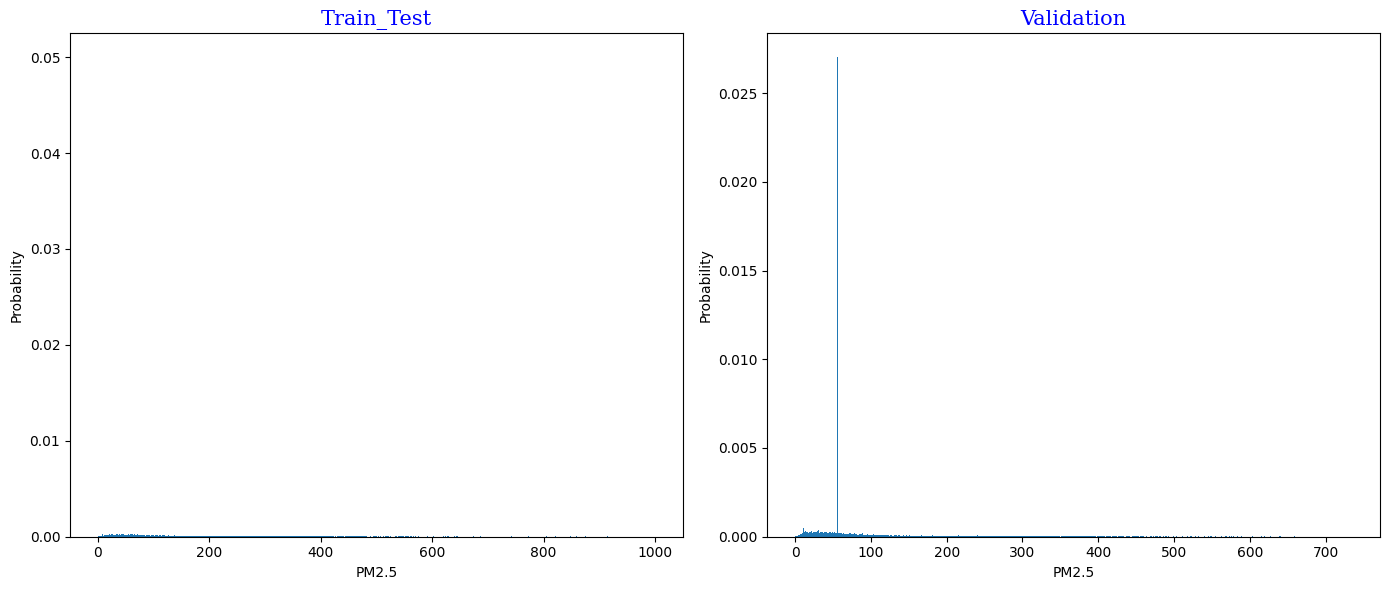

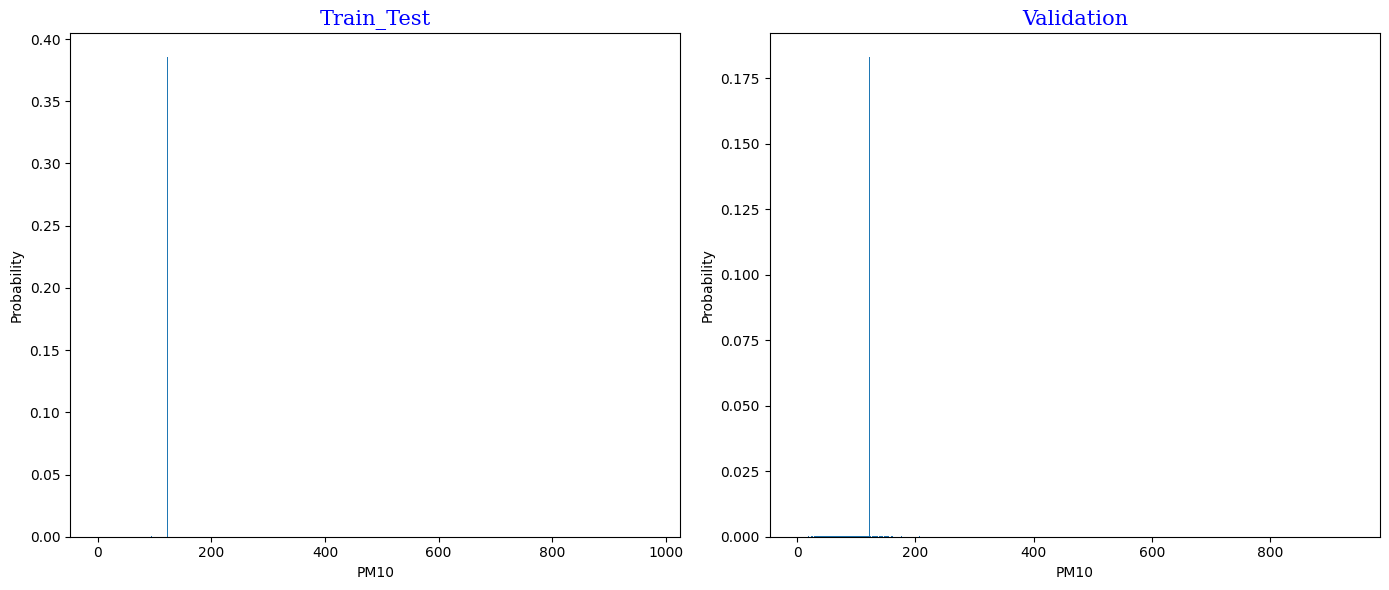

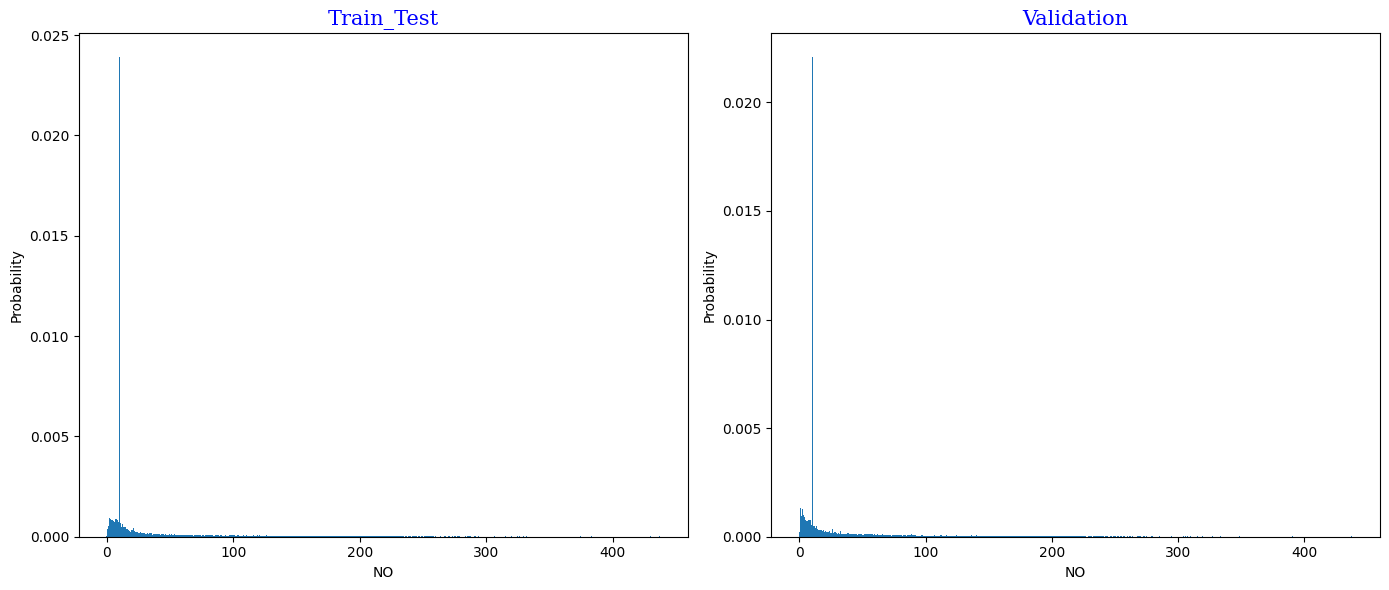

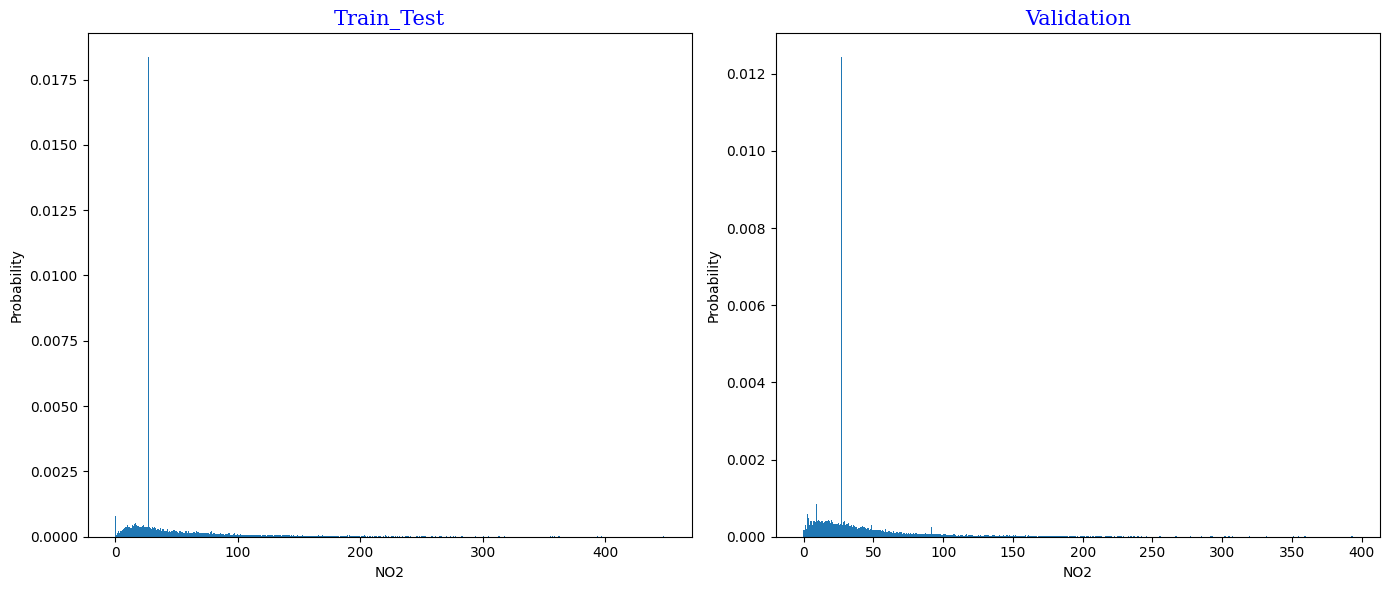

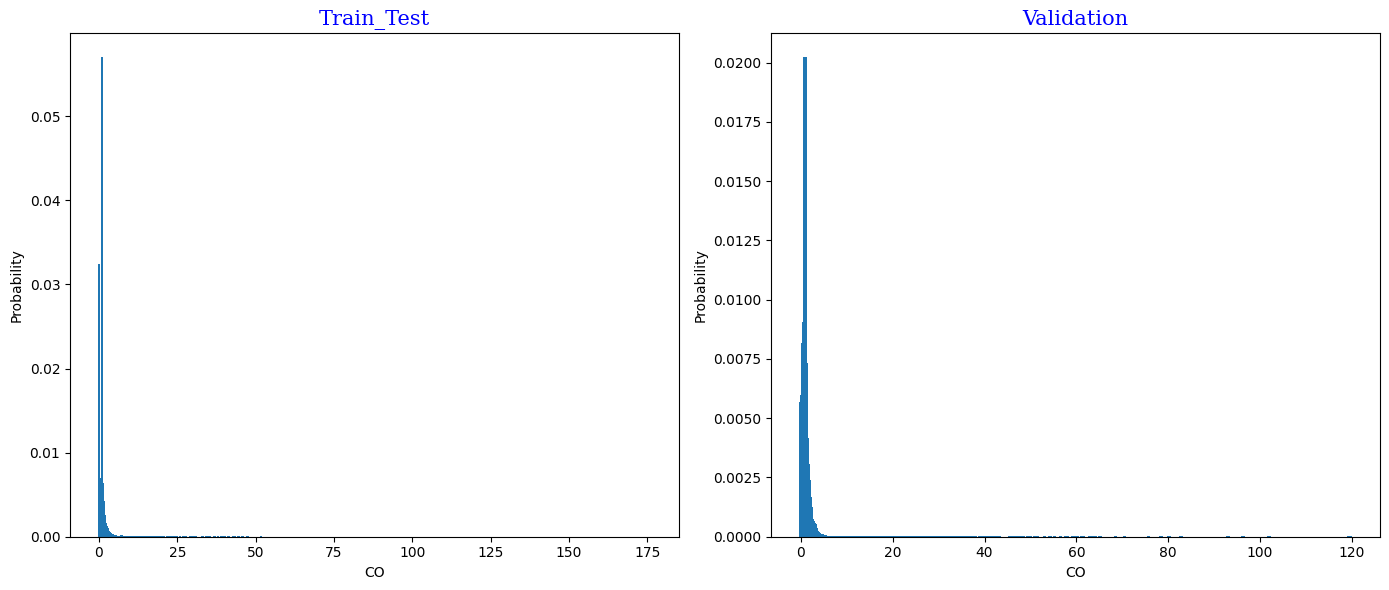

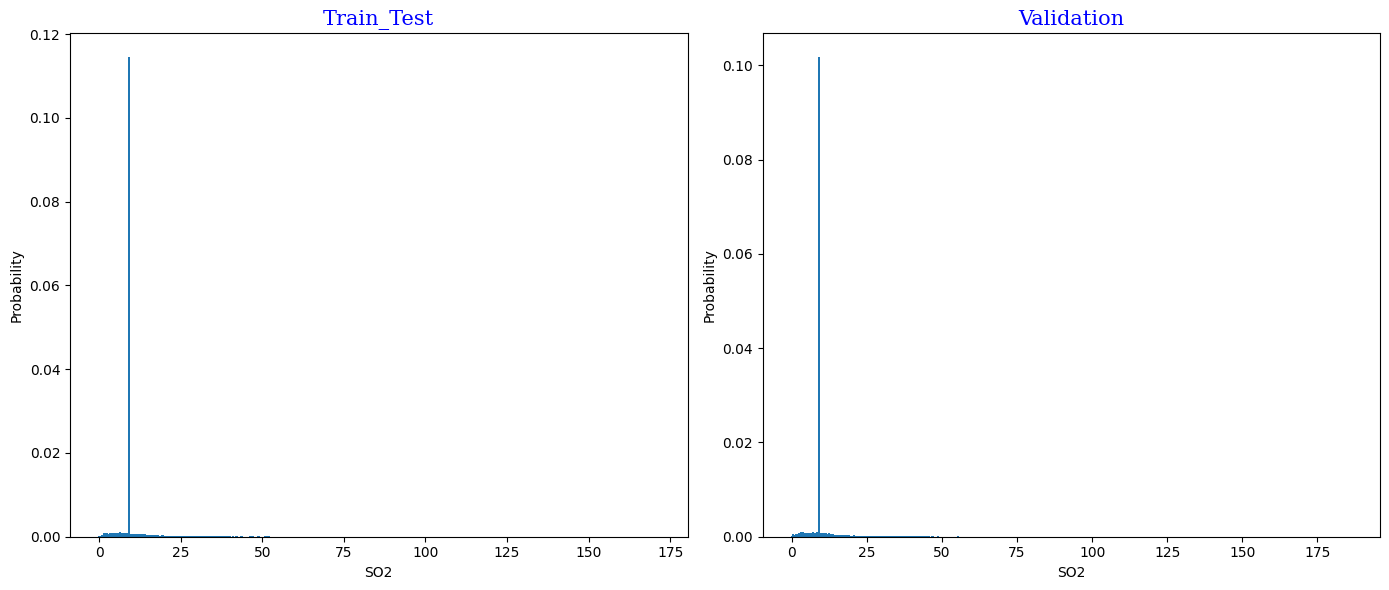

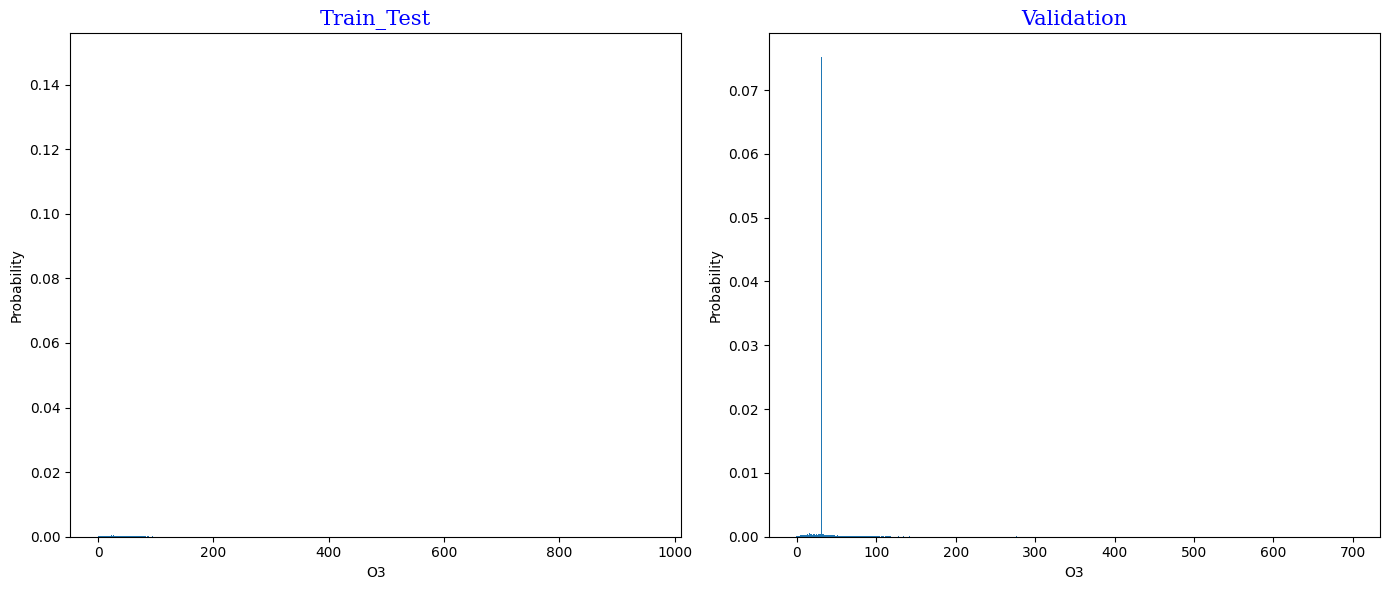

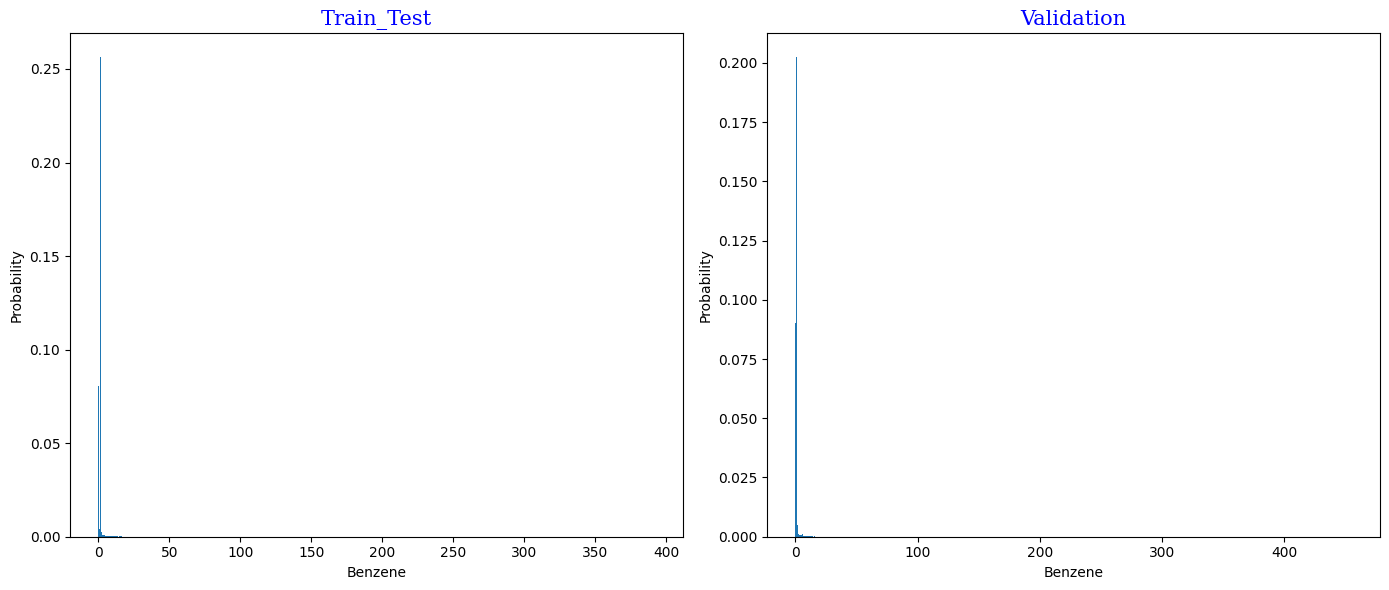

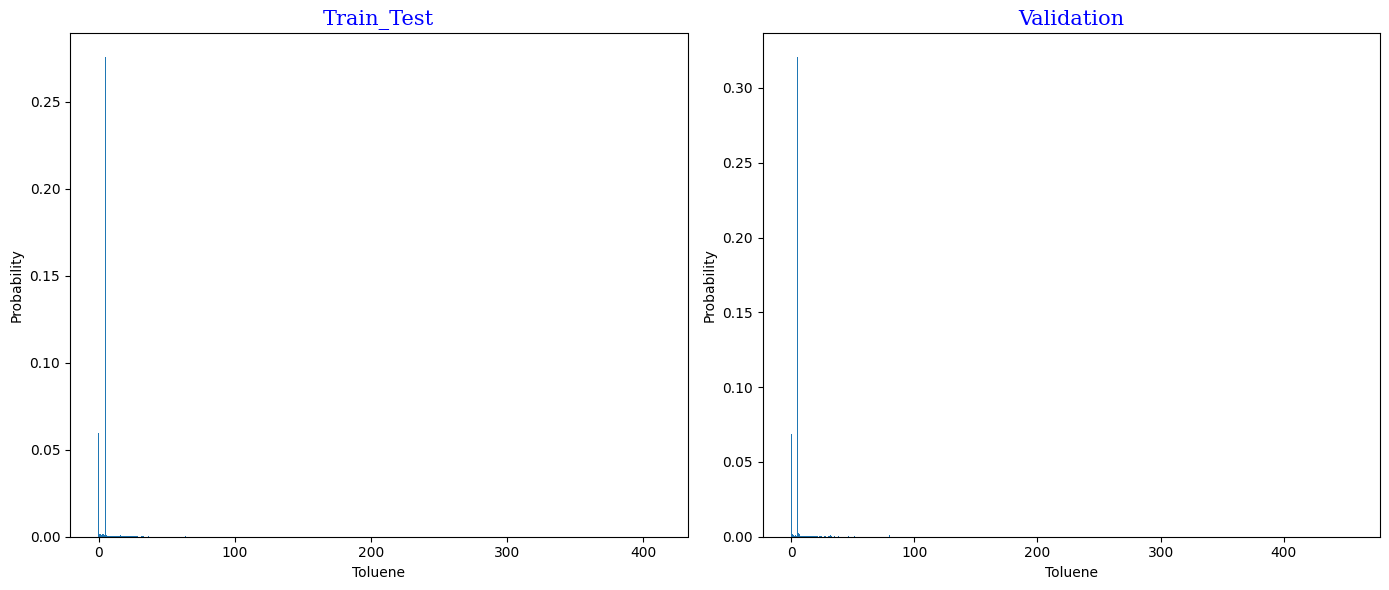

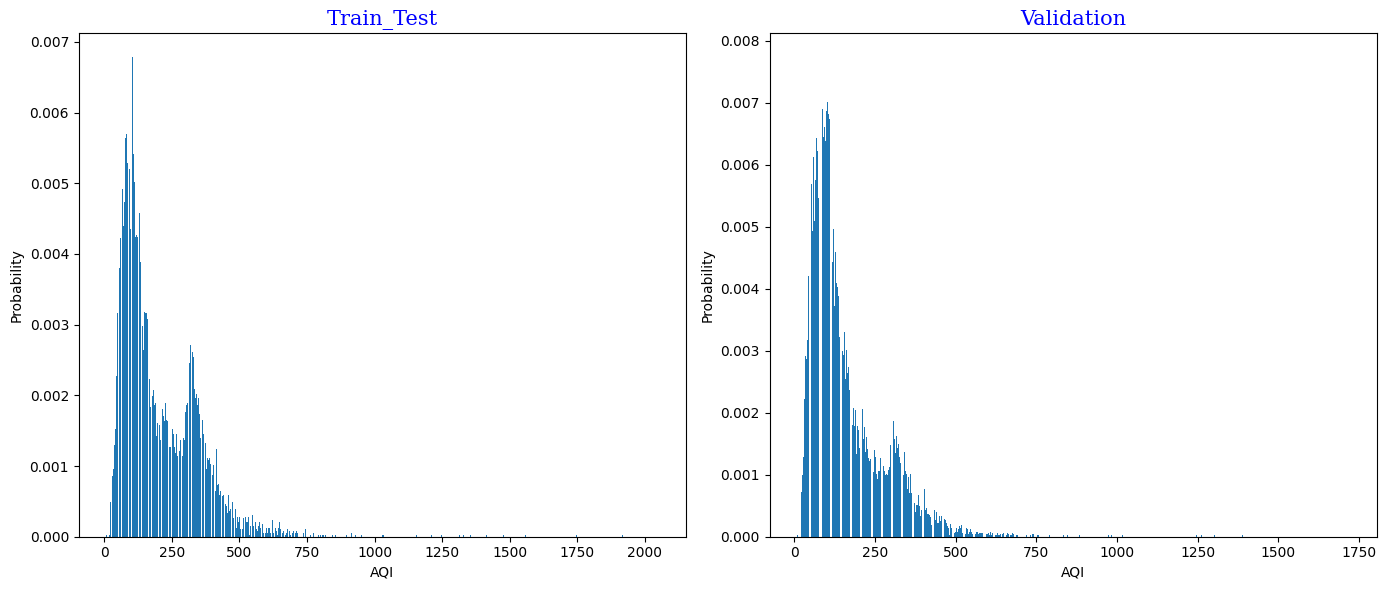

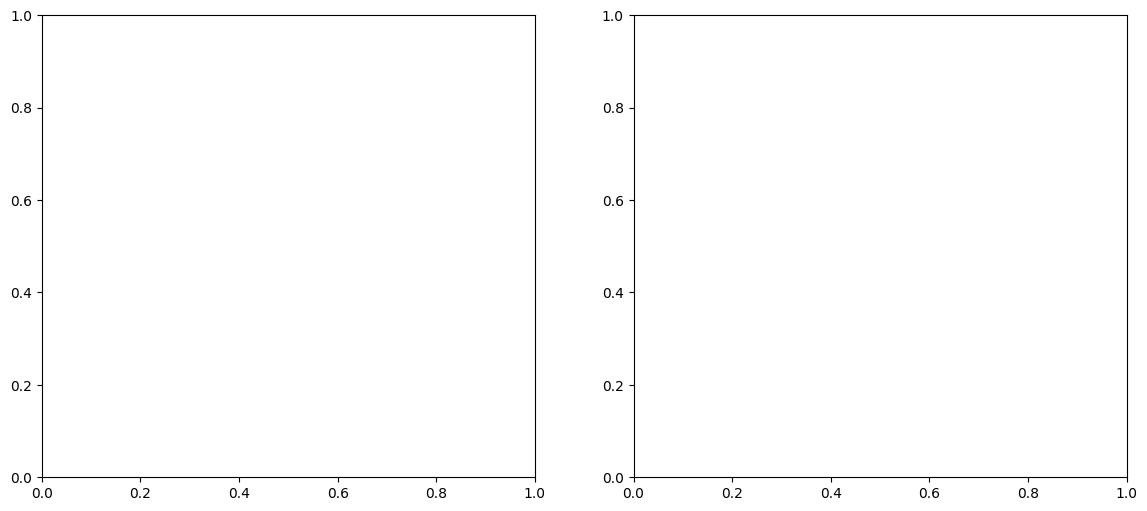

In [52]:
import matplotlib.pyplot as plt
for i in range(df.shape[1]):
    if i !=4:
        distribution_plot(i)

In [143]:
from math import log2
def kl_divergence(p, q):
    return sum(p[i] * log2(p[i]/q[i]) for i in range(len(p)))

In [144]:
KL_divergences = []
for i in range(df.shape[1]):
    KL_divergences.append(kl_divergence(Prob_train_test_normal(i),Prob_valid_normal(i)))
    print('KL(Prob_train || Prob_test) for %s is: %.3f bits' % (df.columns[i],kl_divergence(Prob_train_test_normal(i),Prob_valid_normal(i))))

KL(Prob_train || Prob_test) for PM2.5 is: 1.032 bits
KL(Prob_train || Prob_test) for PM10 is: 1.642 bits
KL(Prob_train || Prob_test) for NO is: 0.608 bits
KL(Prob_train || Prob_test) for NO2 is: 0.616 bits
KL(Prob_train || Prob_test) for NH3 is: 0.640 bits
KL(Prob_train || Prob_test) for CO is: 0.073 bits
KL(Prob_train || Prob_test) for SO2 is: 0.217 bits
KL(Prob_train || Prob_test) for O3 is: 0.505 bits
KL(Prob_train || Prob_test) for Benzene is: 0.089 bits
KL(Prob_train || Prob_test) for Toluene is: 0.311 bits
KL(Prob_train || Prob_test) for AQI is: -0.024 bits


+ PM2.5 has a KL divergence of 1.032 bits, indicating a significant difference between the training and test distributions.
+ PM10 has a KL divergence of 1.642 bits, indicating an even larger difference than PM2.5.
+ NO has a KL divergence of 0.608 bits, indicating a moderate difference between the two distributions.
+ NO2 has a KL divergence of 0.616 bits, indicating a similar moderate difference to NO.
+ NH3 has a KL divergence of 0.64 bits, also indicating a moderate difference.
+ CO has a KL divergence of 0.073 bits, indicating a relatively small difference between the training and test distributions.
+ SO2 has a KL divergence of 0.217 bits, indicating a moderate difference.
+ O3 has a KL divergence of 0.505 bits, indicating a moderate to large difference.
+ Benzene has a KL divergence of 0.089 bits, indicating a relatively small difference.
+ Toluene has a KL divergence of 0.311 bits, indicating a moderate difference.
+ AQI has a KL divergence of -0.024 bits, which is technically negative and indicates that the test distribution has slightly higher probability values than the training distribution.

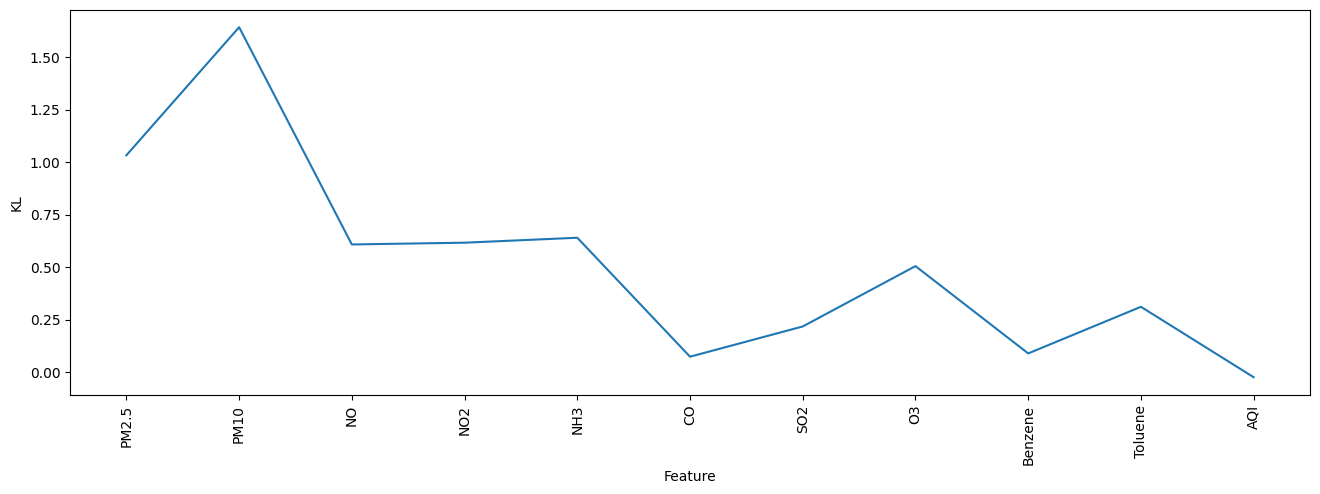

In [145]:
plt.figure(figsize=(16, 5))
plt.plot(train_test_df.columns.tolist(), KL_divergences)
plt.xlabel("Feature")
plt.ylabel("KL")
plt.xticks(train_test_df.columns.tolist(),rotation=90)
plt.show()

In [146]:
from scipy.spatial import distance
js_divergences = []
for i in range(df.shape[1]):
    js_divergences.append(distance.jensenshannon(Prob_train_test_normal(i),Prob_valid_normal(i)))
    print('JSD(Prob_train || Prob_test) for %s is: %.5f bits' % (df.columns[i],distance.jensenshannon(Prob_train_test_normal(i),
                                                                        Prob_valid_normal(i))))

JSD(Prob_train || Prob_test) for PM2.5 is: 0.37527 bits
JSD(Prob_train || Prob_test) for PM10 is: 0.47419 bits
JSD(Prob_train || Prob_test) for NO is: 0.37394 bits
JSD(Prob_train || Prob_test) for NO2 is: 0.29320 bits
JSD(Prob_train || Prob_test) for NH3 is: 0.27426 bits
JSD(Prob_train || Prob_test) for CO is: 0.31098 bits
JSD(Prob_train || Prob_test) for SO2 is: 0.28752 bits
JSD(Prob_train || Prob_test) for O3 is: 0.27806 bits
JSD(Prob_train || Prob_test) for Benzene is: 0.24279 bits
JSD(Prob_train || Prob_test) for Toluene is: 0.41562 bits
JSD(Prob_train || Prob_test) for AQI is: 0.11585 bits


### The JSD values range between 0.11585 bits (for AQI) and 0.47419 bits (for PM10). This indicates that the distributions of some pollutants are more similar between the training and testing datasets than others.

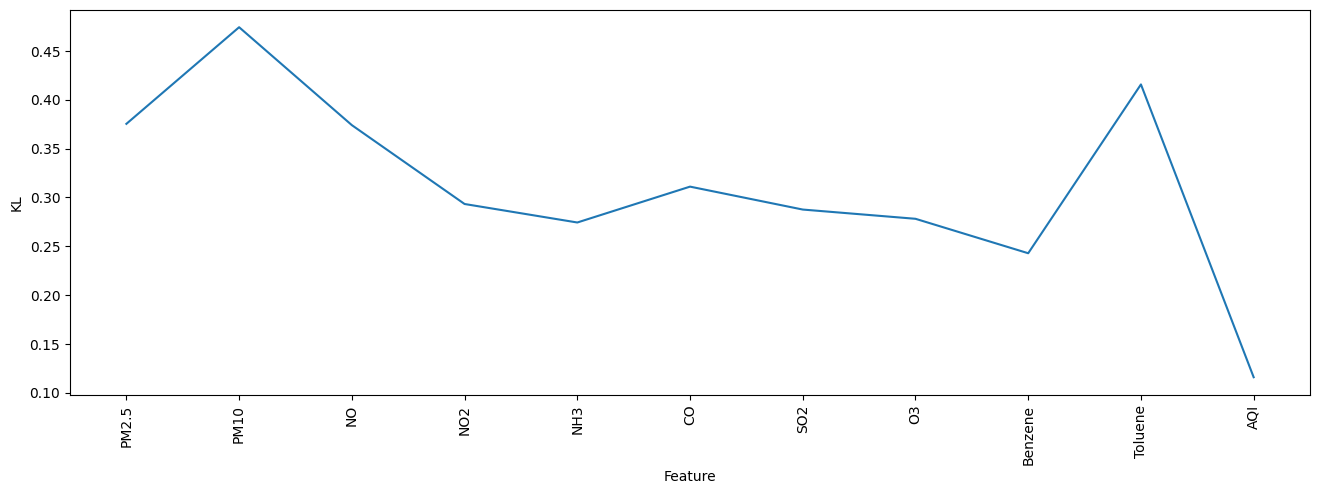

In [147]:
plt.figure(figsize=(16, 5))
plt.plot(df.columns.tolist(), js_divergences)
plt.xlabel("Feature")
plt.ylabel("KL")
plt.xticks(df.columns.tolist(),rotation=90)
plt.show()

<h2> Kolmogorov-Smirnov Test </h2>

<font style="font-size:15px;color:blue;font-style: italic;" > 
We will perform Kolmogorov-Smirnov (K-S) test for detecting whether the two samples are identical or not for numeric data
</font>

In [148]:
from scipy.stats import ks_2samp

In [149]:
KS_test = []
rejected = 0
p_value = 0.05

for i in range(train_test_df.shape[1]):
    col = train_test_df.columns[i]
    tests = ks_2samp(Prob_train_normal(i), Prob_test_normal(i))
    #KS_test.append(test)
    print(col, "-> KS test statistic:", tests[0], "p-value:", tests[1])
    if tests[1] < p_value:
        rejected += 1
        print("Column rejected:", col)

print("We rejected", rejected, "columns in total out of", train_test_df.shape[1], "columns")


PM2.5 -> KS test statistic: 0.17623990772779696 p-value: 5.098775737875649e-236
Column rejected: PM2.5
PM10 -> KS test statistic: 0.42975778546712795 p-value: 0.0
Column rejected: PM10
NO -> KS test statistic: 0.09994232987312579 p-value: 7.695797036216086e-76
Column rejected: NO
NO2 -> KS test statistic: 0.08840830449826986 p-value: 2.0621582780684182e-59
Column rejected: NO2
NH3 -> KS test statistic: 0.06482122260668977 p-value: 4.0846353175441135e-32
Column rejected: NH3
CO -> KS test statistic: 0.009861591695501715 p-value: 0.3656800494940028
SO2 -> KS test statistic: 0.03742791234140719 p-value: 5.468262871384528e-11
Column rejected: SO2
O3 -> KS test statistic: 0.10692041522491347 p-value: 9.156723848164333e-87
Column rejected: O3
Benzene -> KS test statistic: 0.006978085351787788 p-value: 0.7896419893770646
Toluene -> KS test statistic: 0.0893886966551326 p-value: 9.925523463808432e-61
Column rejected: Toluene
AQI -> KS test statistic: 0.0021914648212225663 p-value: 0.9999999999

### Based on the results of the Kolmogorov-Smirnov (KS) test, we rejected 8 columns out of 11. These columns are PM2.5, PM10, NO, NO2, NH3, SO2, O3, and Toluene. These variables are the ones that showed a significant difference between their distributions in the training and test sets, indicating that they have drifted. The remaining variables, CO, Benzene, and AQI, did not show significant differences in their distributions, suggesting that they did not drift significantly.

In [150]:
KS_test = []
rejected = 0
p_value = 0.05

for i in range(validation_df.shape[1]):
    col = validation_df.columns[i]
    tests = ks_2samp(Prob_train_test_normal(i), Prob_valid_normal(i))
    #KS_test.append(test)
    print(col, "-> KS test statistic:", tests[0], "p-value:", tests[1])
    if tests[1] < p_value:
        rejected += 1
        print("Column rejected:", col)

print("We rejected", rejected, "columns in total out of", validation_df.shape[1], "columns")

PM2.5 -> KS test statistic: 0.19217301750772398 p-value: 0.0
Column rejected: PM2.5
PM10 -> KS test statistic: 0.2546858908341916 p-value: 0.0
Column rejected: PM10
NO -> KS test statistic: 0.11352557500858218 p-value: 5.669559007620472e-164
Column rejected: NO
NO2 -> KS test statistic: 0.09711637487126668 p-value: 5.061482515275953e-120
Column rejected: NO2
NH3 -> KS test statistic: 0.06913834534843799 p-value: 5.550498072663885e-61
Column rejected: NH3
CO -> KS test statistic: 0.025163062135255765 p-value: 1.9159433031623213e-08
Column rejected: CO
SO2 -> KS test statistic: 0.04651561963611395 p-value: 7.976148214826542e-28
Column rejected: SO2
O3 -> KS test statistic: 0.057088911774802575 p-value: 1.0562748903512745e-41
Column rejected: O3
Benzene -> KS test statistic: 0.018262959148644065 p-value: 0.00011910613225498774
Column rejected: Benzene
Toluene -> KS test statistic: 0.06501888087881913 p-value: 5.637901587905184e-54
Column rejected: Toluene
AQI -> KS test statistic: 0.00151

### Based on the information provided, it appears that a Kolmogorov-Smirnov (KS) test was performed on a dataset containing 11 columns, and the results indicate that 10 of those columns (all except AQI) were found to have drifted variables. 
### The columns that were rejected based on the KS test results are PM2.5, PM10, NO, NO2, NH3, CO, SO2, O3, Benzene, and Toluene. These columns had low p-values, indicating that their distributions were significantly different from the reference distribution, and thus were considered to have drifted variables. 

<h2> Population Stability Index </h2>



### Population Stability Index: PSI is a symmetric version of KL Divergence. It's used a lot in financial domain and below are some widely accepted threshold for it. It's used for detecting the data-drift in numerical columns.

a) When PSI<=0.1<br>
This means there is no change or shift in the distributions of both datasets.
              
b) 0.1< PSI<0.2<br>
This indicates a slight change or shift has occurred.
                
c) PSI>0.2<br>
This indicates a large shift in the distribution has occurred between both datasets.

</font>

In [153]:
import numpy as np

def calculate_psi(expected, actual, buckettype='bins', buckets=10, axis=0):
    '''Calculate the PSI (population stability index) across all variables
    Args:
       expected: numpy matrix of original values
       actual: numpy matrix of new values, same size as expected
       buckettype: type of strategy for creating buckets, bins splits into even splits, quantiles splits into quantile buckets
       buckets: number of quantiles to use in bucketing variables
       axis: axis by which variables are defined, 0 for vertical, 1 for horizontal
    Returns:
       psi_values: ndarray of psi values for each variable
    Author:
       Matthew Burke
       github.com/mwburke
       worksofchart.com
    '''

    def psi(expected_array, actual_array, buckets):
        '''Calculate the PSI for a single variable
        Args:
           expected_array: numpy array of original values
           actual_array: numpy array of new values, same size as expected
           buckets: number of percentile ranges to bucket the values into
        Returns:
           psi_value: calculated PSI value
        '''

        def scale_range (input, min, max):
            input += -(np.min(input))
            input /= np.max(input) / (max - min)
            input += min
            return input


        breakpoints = np.arange(0, buckets + 1) / (buckets) * 100

        if buckettype == 'bins':
            breakpoints = scale_range(breakpoints, np.min(expected_array), np.max(expected_array))
        elif buckettype == 'quantiles':
            breakpoints = np.stack([np.percentile(expected_array, b) for b in breakpoints])



        expected_percents = np.histogram(expected_array, breakpoints)[0] / len(expected_array)
        actual_percents = np.histogram(actual_array, breakpoints)[0] / len(actual_array)

        def sub_psi(e_perc, a_perc):
            '''Calculate the actual PSI value from comparing the values.
               Update the actual value to a very small number if equal to zero
            '''
            if a_perc == 0:
                a_perc = 0.0001
            if e_perc == 0:
                e_perc = 0.0001

            value = (e_perc - a_perc) * np.log(e_perc / a_perc)
            return(value)

        psi_value = np.sum(sub_psi(expected_percents[i], actual_percents[i]) for i in range(0, len(expected_percents)))

        return(psi_value)

    if len(expected.shape) == 1:
        psi_values = np.empty(len(expected.shape))
    else:
        psi_values = np.empty(expected.shape[axis])

    for i in range(0, len(psi_values)):
        if len(psi_values) == 1:
            psi_values = psi(expected, actual, buckets)
        elif axis == 0:
            psi_values[i] = psi(expected[:,i], actual[:,i], buckets)
        elif axis == 1:
            psi_values[i] = psi(expected[i,:], actual[i,:], buckets)

    return(psi_values)

In [154]:
for i in range(train_test_df.shape[1]):
    col = train_test_df.columns[i]
    expected = np.array(Prob_train_normal(i))
    actual = np.array(Prob_test_normal(i))
    psi_val = calculate_psi(expected, actual)
    if psi_val < 0.1:
        print(col, psi_val, " -> No significant drift/shift detected")
    elif psi_val >= 0.1 and psi_val < 0.2:
        print(col, psi_val, " -> Slight drift/shift detected")
    else:
        print(col, psi_val, " -> Significant drift/shift detected")

PM2.5 1.0634435215888407  -> Significant drift/shift detected
PM10 4.6599338490776124e-05  -> No significant drift/shift detected
NO 0.08147774671868524  -> No significant drift/shift detected
NO2 4.6599338490776124e-05  -> No significant drift/shift detected
NH3 0.38794410748770547  -> Significant drift/shift detected
CO 0.0008607693386283269  -> No significant drift/shift detected
SO2 0.003659546871959938  -> No significant drift/shift detected
O3 0.3433677814796059  -> Significant drift/shift detected
Benzene 0.0005292728445467728  -> No significant drift/shift detected
Toluene 0.0038494460772238795  -> No significant drift/shift detected
AQI 0.003957039279316073  -> No significant drift/shift detected


### Drift or shift refers to a change in the values of a particular variable over time. In the case of air pollutants, a significant drift or shift may indicate a change in the level of pollution in the air.

### Looking at the values, it appears that there is a significant drift/shift detected in the PM2.5 and NH3 values, and a significant drift/shift detected in the O3 value as well.

### On the other hand, there is no significant drift/shift detected in the PM10, NO, NO2, CO, SO2, Benzene, Toluene, and AQI values.

In [155]:
for i in range(validation_df.shape[1]):
    col = validation_df.columns[i]
    expected = np.array(Prob_train_test_normal(i))
    actual = np.array(Prob_valid_normal(i))
    psi_val = calculate_psi(expected, actual)
    if psi_val < 0.1:
        print(col, psi_val, " -> No significant drift/shift detected")
    elif psi_val >= 0.1 and psi_val < 0.2:
        print(col, psi_val, " -> Slight drift/shift detected")
    else:
        print(col, psi_val, " -> Significant drift/shift detected")

        

PM2.5 0.000140428973111608  -> No significant drift/shift detected
PM10 0.000140428973111608  -> No significant drift/shift detected
NO 0.0  -> No significant drift/shift detected
NO2 0.000140428973111608  -> No significant drift/shift detected
NH3 0.000140428973111608  -> No significant drift/shift detected
CO 0.0004224229702169376  -> No significant drift/shift detected
SO2 0.0021804934435427255  -> No significant drift/shift detected
O3 0.000140428973111608  -> No significant drift/shift detected
Benzene 0.00024590915525190177  -> No significant drift/shift detected
Toluene 0.0008829274372479058  -> No significant drift/shift detected
AQI 0.0034378470294338225  -> No significant drift/shift detected


### the pollutant parameters that did not show any significant drift or shift are: PM2.5, PM10, NO, NO2, NH3, O3, and Benzene.

### The pollutant parameters that showed some significant drift or shift are: CO, SO2, Toluene, and AQI.